# Data I-A

#### IMPORTING FILES

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os, glob
path=os.getcwd()
data=pd.read_csv(path+"\data.csv")
data.drop(['West Bengal1'],axis=1,inplace=True) # dropping West Bengal's column as the values are not significant and not available.

#### DATA CLEANING AND AGGREGATING

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Replacing the GSDP of the states with mean+2(standard deviation). <br>
As the GSDP values of majority of the states are increasing with a value almost equal to mean+2(standard deviation). </p>

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Replacing the % growth over previous years of the states with the median value as it's the more prominant than other statistical values in this situation. </p>

In [2]:
data[0:6].fillna(data[0:6].mean()+2*(data[0:6].std()),inplace=True)
data[6:].fillna(data[6:].median(),inplace=True)

C:\Users\Ravikanth Ch\Anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [3]:
states=['Andhra Pradesh ',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh','Goa','Gujarat',
       'Haryana', 'Himachal Pradesh','Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand']

#### % GROWTH OVER PREVIOUS YEAR

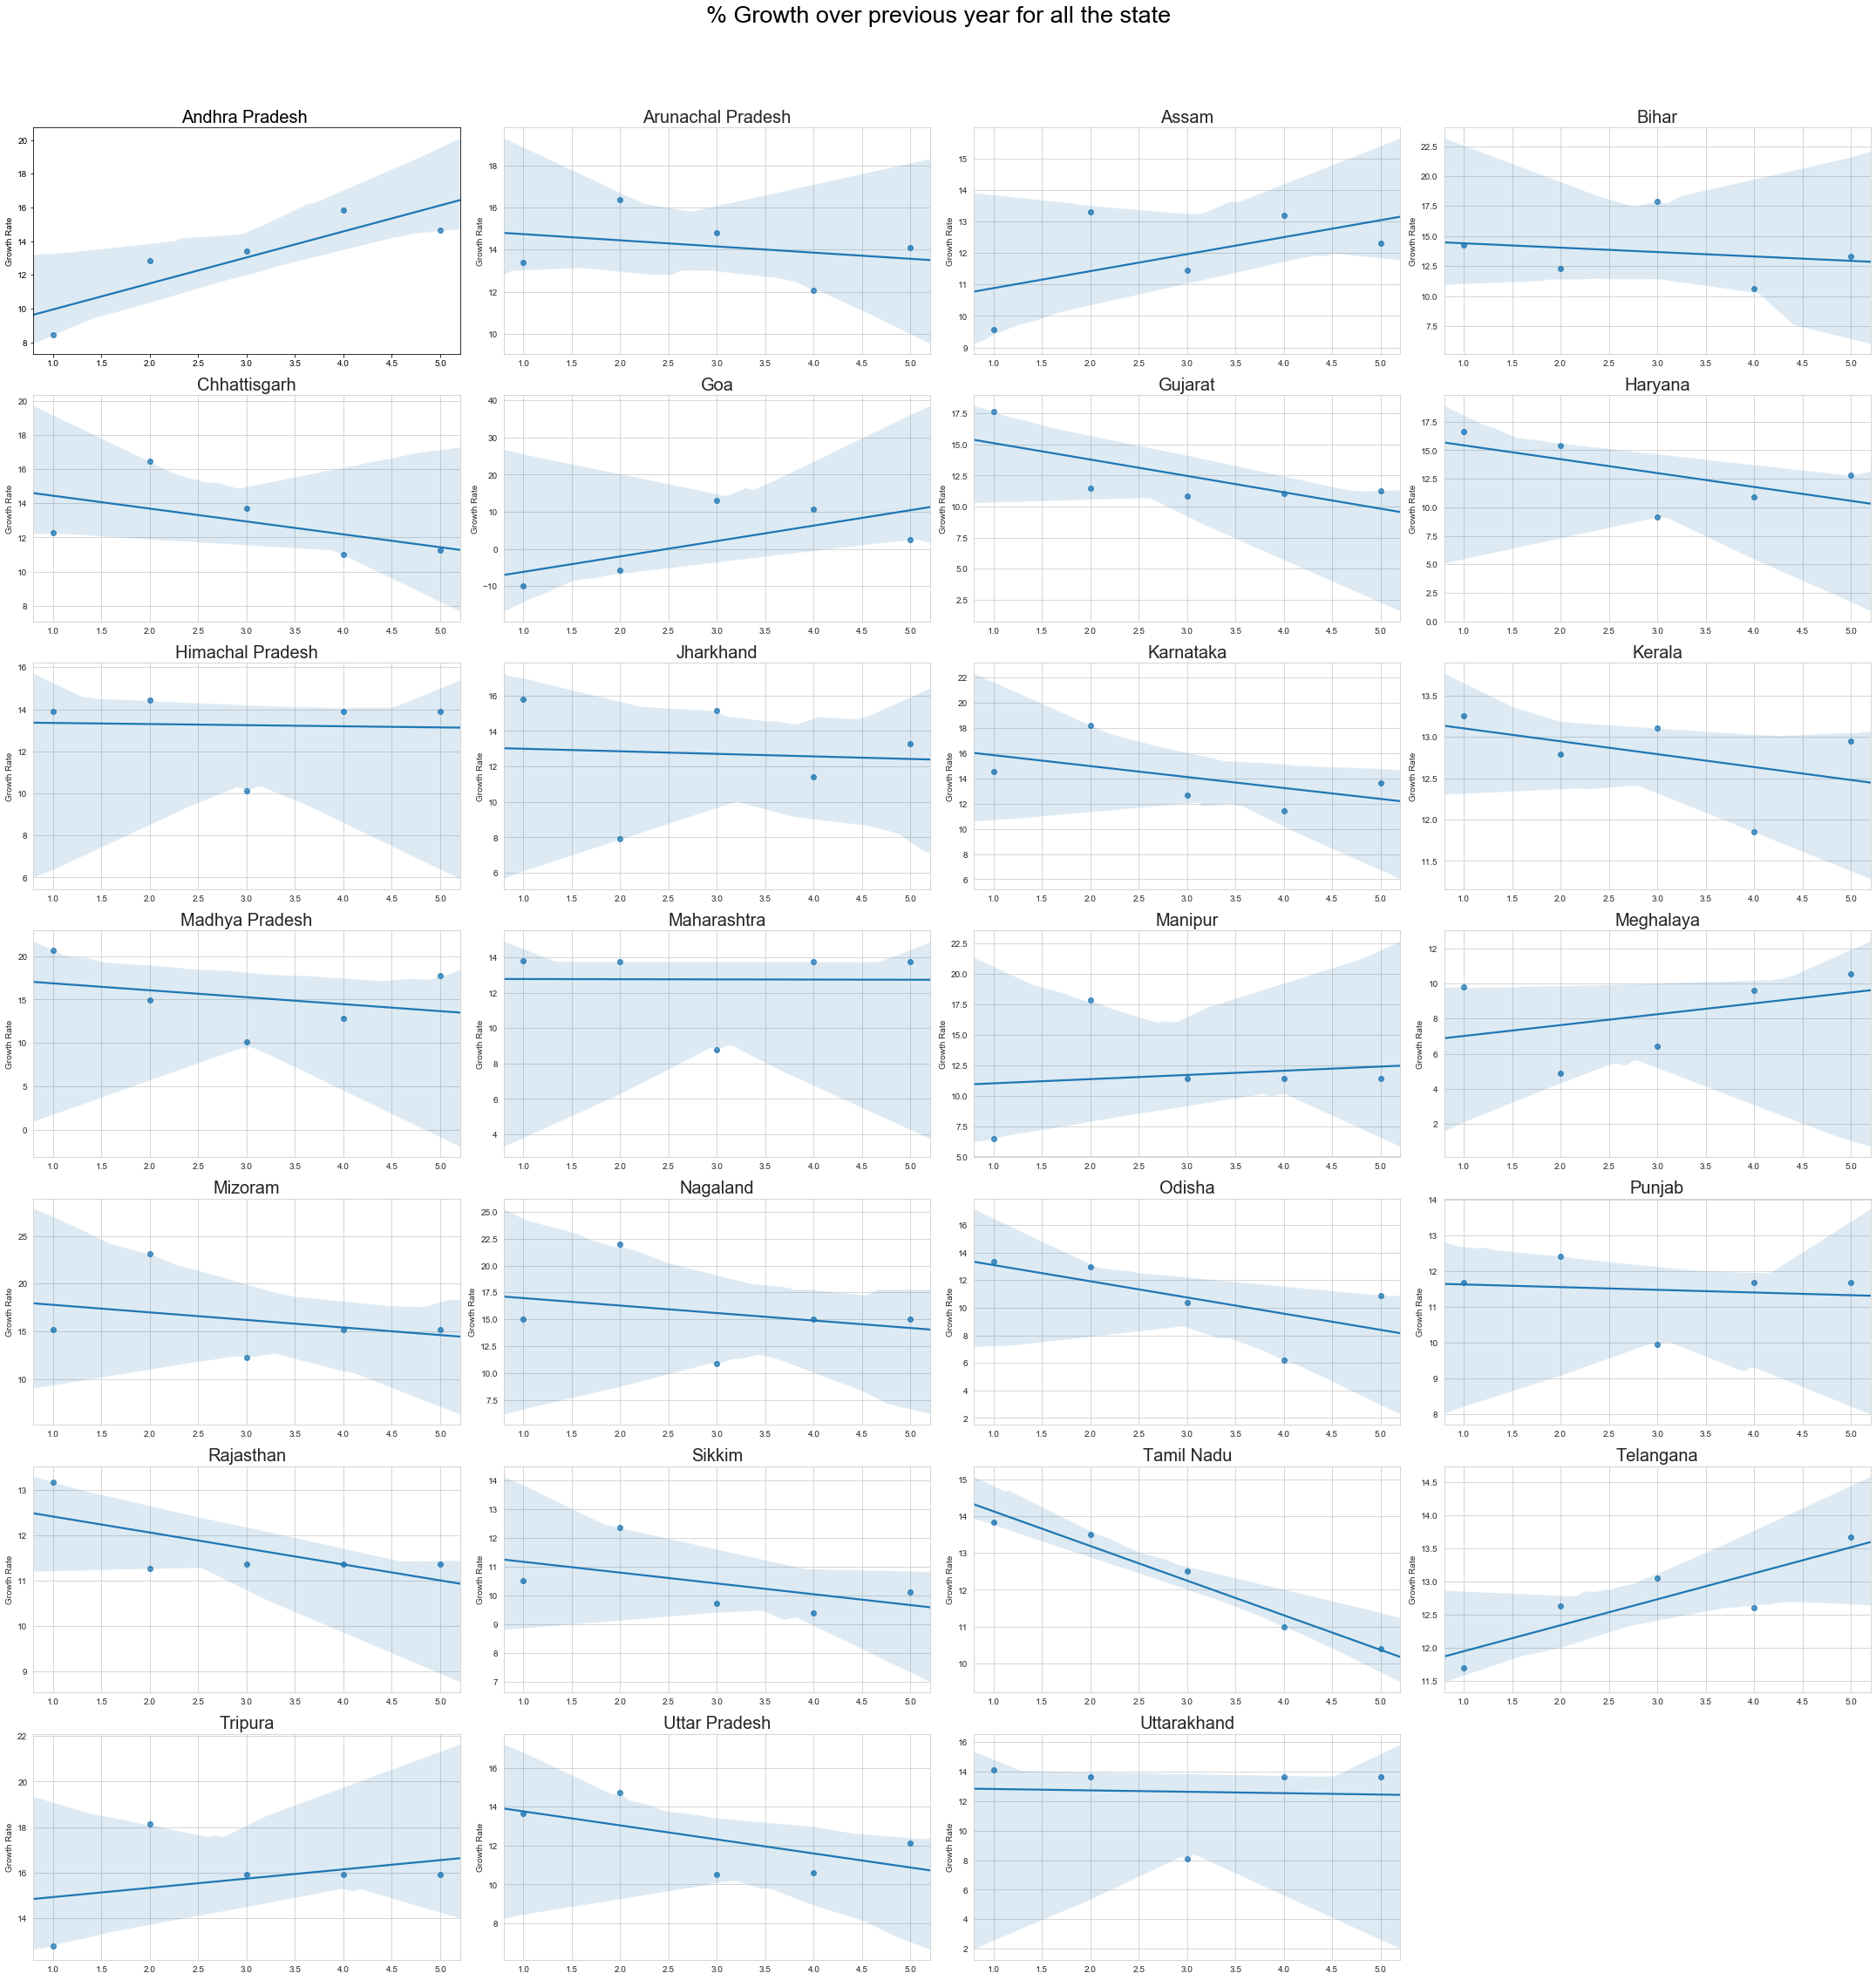

In [4]:
j=1
m=6
fig=plt.figure(figsize=(30,30))
fig.suptitle('% Growth over previous year for all the state',x=0.5, y=1.05,fontsize=27)
for i in states:
    
    plt.subplot(7,4,j)
    sns.set_style('whitegrid')
    sns.regplot(x=[1,2,3,4,5], y=i, data=data[6:],marker='o')
    plt.title(i,fontsize=20)
    plt.ylabel('Growth Rate')
    j=j+1
    
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Growth Rate')

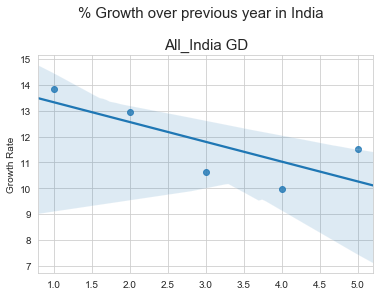

In [5]:
fig=plt.figure()
fig.suptitle('% Growth over previous year in India',x=0.5, y=1.05,fontsize=15)
sns.set_style('whitegrid')
sns.regplot(x=[1,2,3,4,5], y='All_India GDP', data=data[6:],marker='o')
plt.title('All_India GD',fontsize=15)
plt.ylabel('Growth Rate')

#### % Growth over previous year for all the States and the Nation can also be clearly understood by plotting Line charts

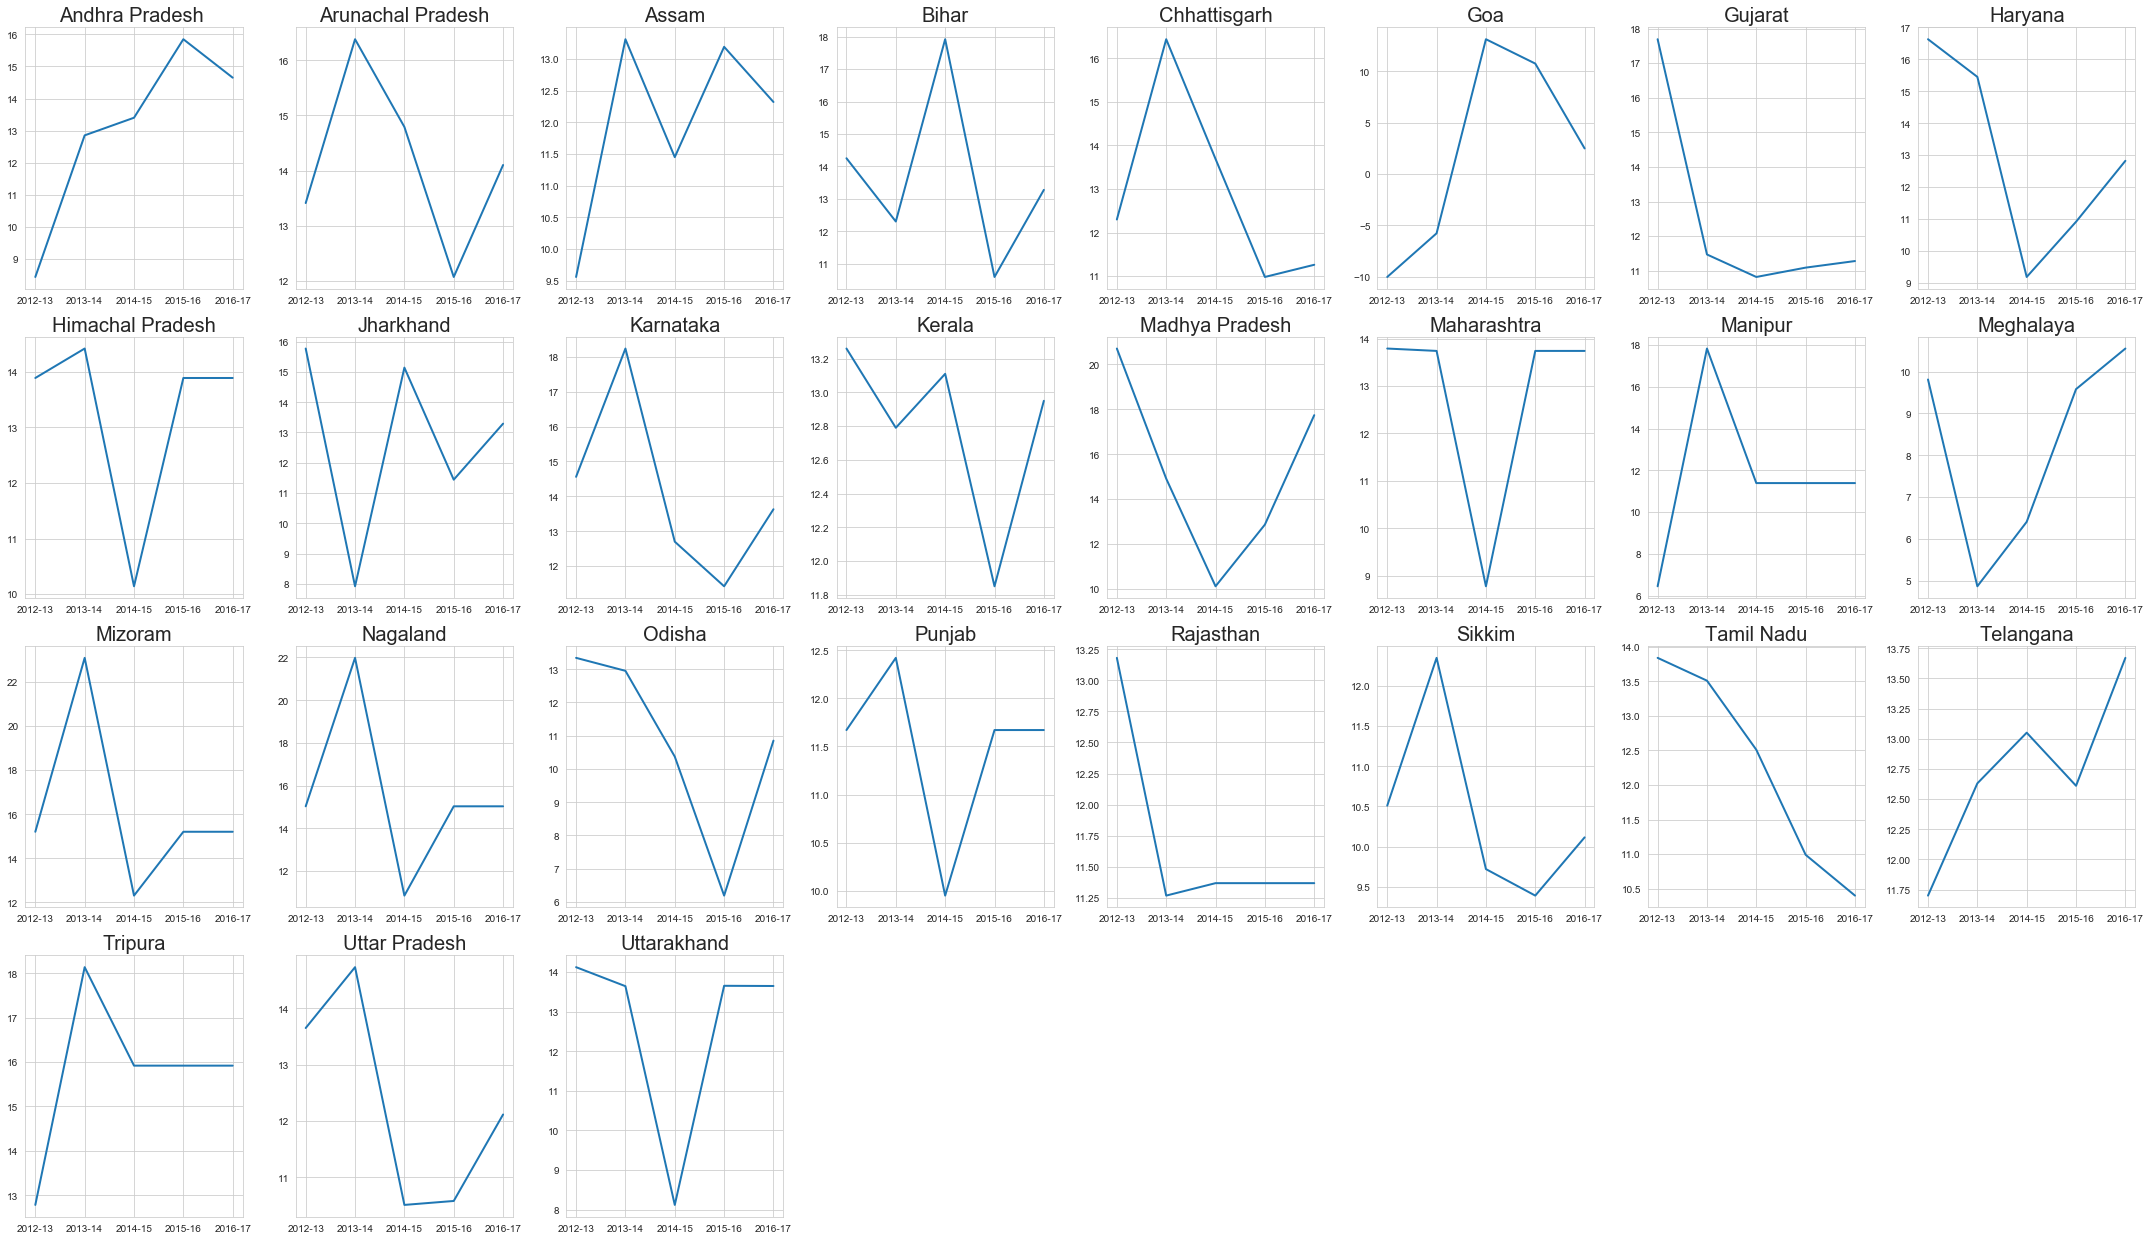

In [6]:
j=1
plt.figure(figsize=(30,30))
for i in states:
    
    plt.subplot(7,8,j)
    sns.set_style('whitegrid')
    plt.plot(data[6:].Duration,data[6:][i],linewidth=2)
    plt.title(i,fontsize=20)
    j=j+1
    
plt.tight_layout()
plt.show()

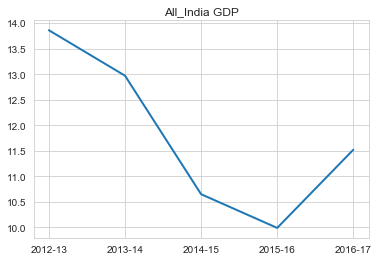

In [7]:
#plt.figure(figsize=(30,30))
plt.plot(data[6:].Duration,data[6:]['All_India GDP'],linewidth=2)
plt.title('All_India GDP')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">This figure represents the percentage growth of GDP over a period of time. We can observe that in year 2015-16, the percentage growth was very less. The growth percentage dropped from 2012-2016 continuously and then increased in 2016. </p>


#### COMPARING GROWTH RATE OF 2 STATES

          Assam     Bihar
Assam  1.000000 -0.554421
Bihar -0.554421  1.000000
                   Arunachal Pradesh  Telangana
Arunachal Pradesh            1.00000    0.20535
Telangana                    0.20535    1.00000
           Karnataka    Sikkim
Karnataka   1.000000  0.994209
Sikkim      0.994209  1.000000
               Uttar Pradesh   Mizoram
Uttar Pradesh       1.000000  0.802822
Mizoram             0.802822  1.000000


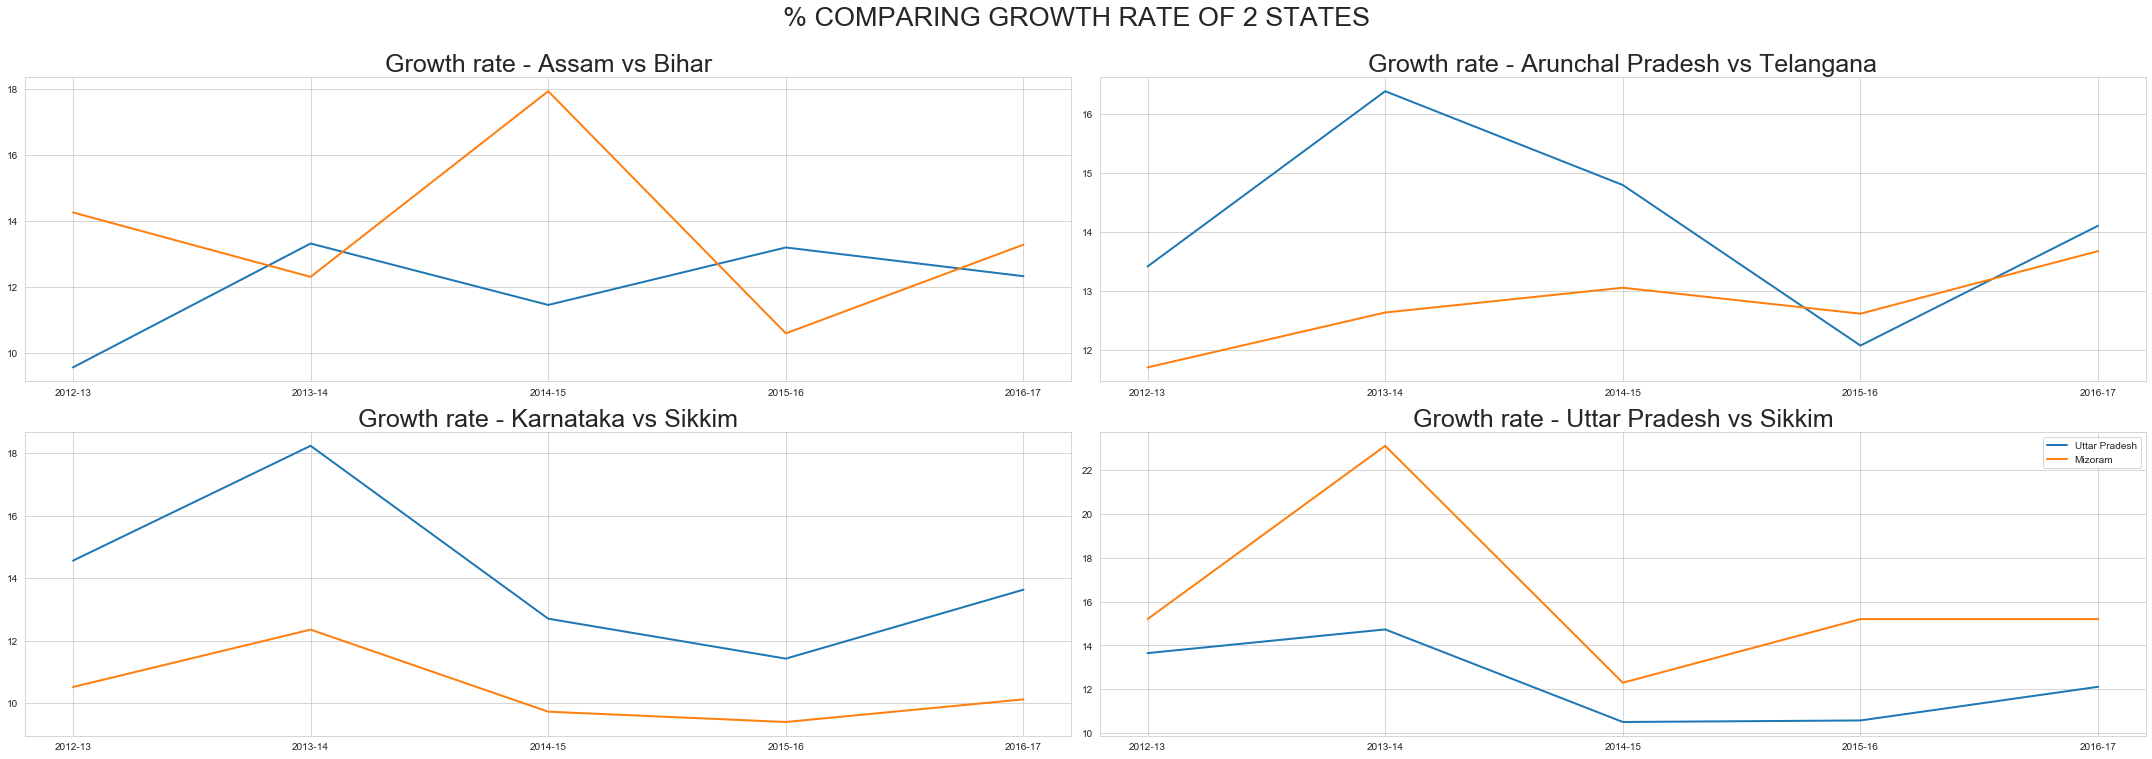

In [8]:
fig=plt.figure(figsize=(30,10))
fig.suptitle('% COMPARING GROWTH RATE OF 2 STATES',x=0.5, y=1.05,fontsize=27)
plt.subplot(2,2,1)
print(data[6:][['Assam','Bihar']].corr())
plt.plot(data[6:].Duration,data[6:]['Assam'],label='Assam',linewidth=2)
plt.plot(data[6:].Duration,data[6:]['Bihar'],label='Bihar',linewidth=2)
plt.title('Growth rate - Assam vs Bihar',fontsize=25)
plt.subplot(2,2,2)
print(data[6:][['Arunachal Pradesh','Telangana']].corr())
plt.plot(data[6:].Duration,data[6:]['Arunachal Pradesh'],label='Arunachal Pradesh',linewidth=2)
plt.plot(data[6:].Duration,data[6:]['Telangana'],label='Telangana',linewidth=2)
plt.title('Growth rate - Arunchal Pradesh vs Telangana',fontsize=25)
plt.subplot(2,2,3)
print(data[6:][['Karnataka','Sikkim']].corr())
plt.plot(data[6:].Duration,data[6:]['Karnataka'],label='Karnataka',linewidth=2)
plt.plot(data[6:].Duration,data[6:]['Sikkim'],label='Sikkim',linewidth=2)
plt.title('Growth rate - Karnataka vs Sikkim',fontsize=25)
plt.subplot(2,2,4)
print(data[6:][['Uttar Pradesh','Mizoram']].corr())
plt.plot(data[6:].Duration,data[6:]['Uttar Pradesh'],label='Uttar Pradesh',linewidth=2)
plt.plot(data[6:].Duration,data[6:]['Mizoram'],label='Mizoram',linewidth=2)
plt.title('Growth rate - Uttar Pradesh vs Sikkim',fontsize=25)
plt.legend()
plt.tight_layout()
plt.show()

#### Average Growth rate of all the states

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We can compare the growth rate of 2 states using the bar charts as well </p>

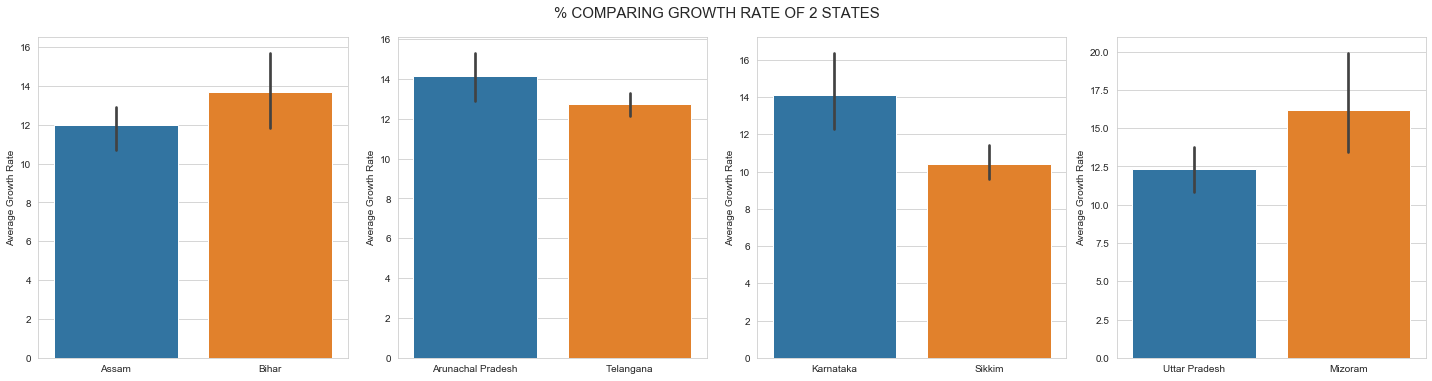

In [9]:
fig=plt.figure(figsize=(20,5))
fig.suptitle('% COMPARING GROWTH RATE OF 2 STATES',x=0.5, y=1.05,fontsize=15)
plt.subplot(1,4,1)
bp=sns.barplot(data=data[6:][['Assam','Bihar']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.subplot(1,4,2)
bp=sns.barplot(data=data[6:][['Arunachal Pradesh','Telangana']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.subplot(1,4,3)
bp=sns.barplot(data=data[6:][['Karnataka','Sikkim']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.subplot(1,4,4)
bp=sns.barplot(data=data[6:][['Uttar Pradesh','Mizoram']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">In this plot, we can say the average growth rate of Bihar, Arunachal Pradesh, Karnataka and Mizoram are greater than that of Assam, Telangana, Sikkim and Uttar Pradesh respectively. That means the first set of states are growing faster than the states in second set.</p>

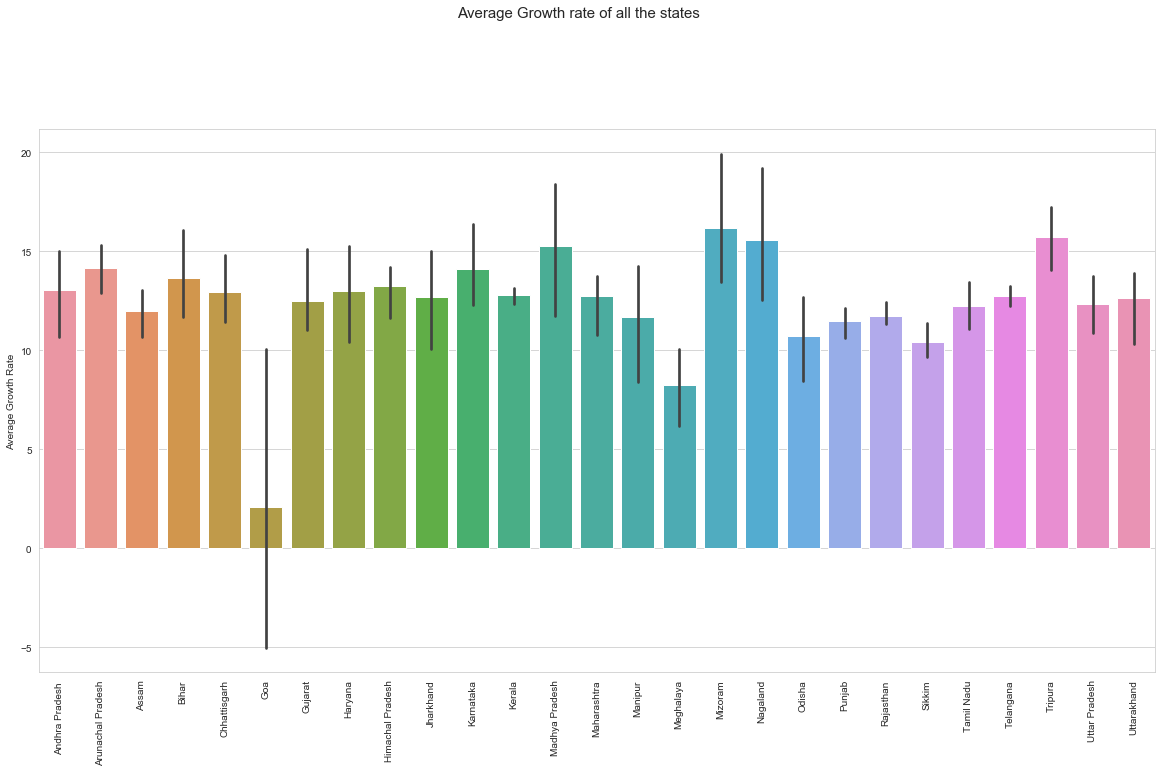

In [10]:
fig=plt.figure(figsize=(20,10))
fig.suptitle('Average Growth rate of all the states',x=0.5, y=1.05,fontsize=15)
sns.set_style('whitegrid')
sns.barplot(data=data[6:][states],estimator=np.average)
plt.xticks(rotation=90)
plt.ylabel('Average Growth Rate')
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The figure shows the average percentage growth rate for all the states over a period of 2012-2017. This helps us to delve into the GDP growth rates  and performance of each state over a period of time.
</p>

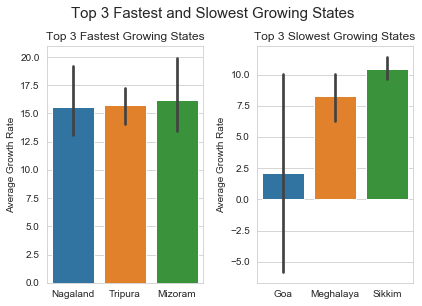

In [11]:
fig=plt.figure()
fig.suptitle('Top 3 Fastest and Slowest Growing States',x=0.5, y=1.05,fontsize=15)
plt.subplot(1,2,1)
bp=sns.barplot(data=data[6:][['Nagaland','Tripura','Mizoram']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.title('Top 3 Fastest Growing States')
plt.subplot(1,2,2)
bp=sns.barplot(data=data[6:][['Goa','Meghalaya','Sikkim']],estimator=np.average) 
plt.ylabel("Average Growth Rate")
plt.title('Top 3 Slowest Growing States')
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Even Odisha has very less Average growth rate and is very close to that of Sikkim's.</p>

#### NATION'S GROWTH RATE

The Nation's growth rate is  11.797999999999998


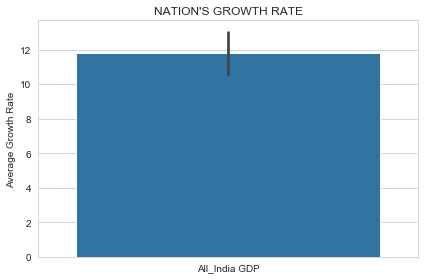

In [12]:
print("The Nation's growth rate is ",data[6:]['All_India GDP'].mean())
bp=sns.barplot(data=data[6:][['All_India GDP']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.title("NATION'S GROWTH RATE")
plt.tight_layout()
plt.show()

#### HOME STATE GROWTH VS ALL INDIA GROWTH RATE

               Telangana  All_India GDP
Telangana       1.000000      -0.574626
All_India GDP  -0.574626       1.000000


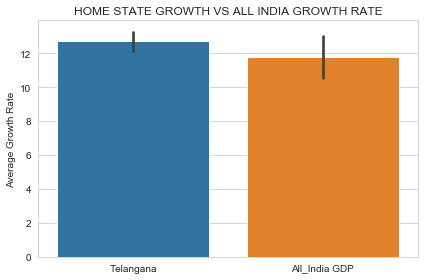

In [13]:
state_vs_india=data[6:][['Telangana','All_India GDP']]
print(state_vs_india.corr())
bp=sns.barplot(data=data[6:][['Telangana','All_India GDP']],estimator=np.average)
plt.ylabel("Average Growth Rate")
plt.title("HOME STATE GROWTH VS ALL INDIA GROWTH RATE")
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> From the above graph, we can say that average growth rate of Telangana state is greater than than of All India.<br> This is beacause of the states which has low average growth rate.<br>
Over the years,  if the growth rate of Telangana increases, India growth rate decreases because of the other states performances or vice versa.
Telangana and India have a correlation coefficient of -0.5
</p>

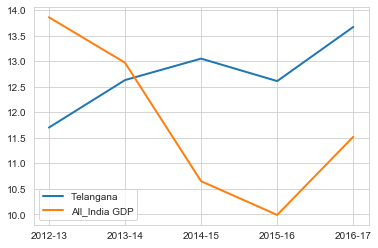

In [14]:
plt.plot(data[6:].Duration,data[6:]['Telangana'],label='Telangana',linewidth=2)
plt.plot(data[6:].Duration,data[6:]['All_India GDP'],label='All_India GDP',linewidth=2)
plt.legend()
plt.show()

#### TOTAL GDP OF ALL STATES IN 2015-16

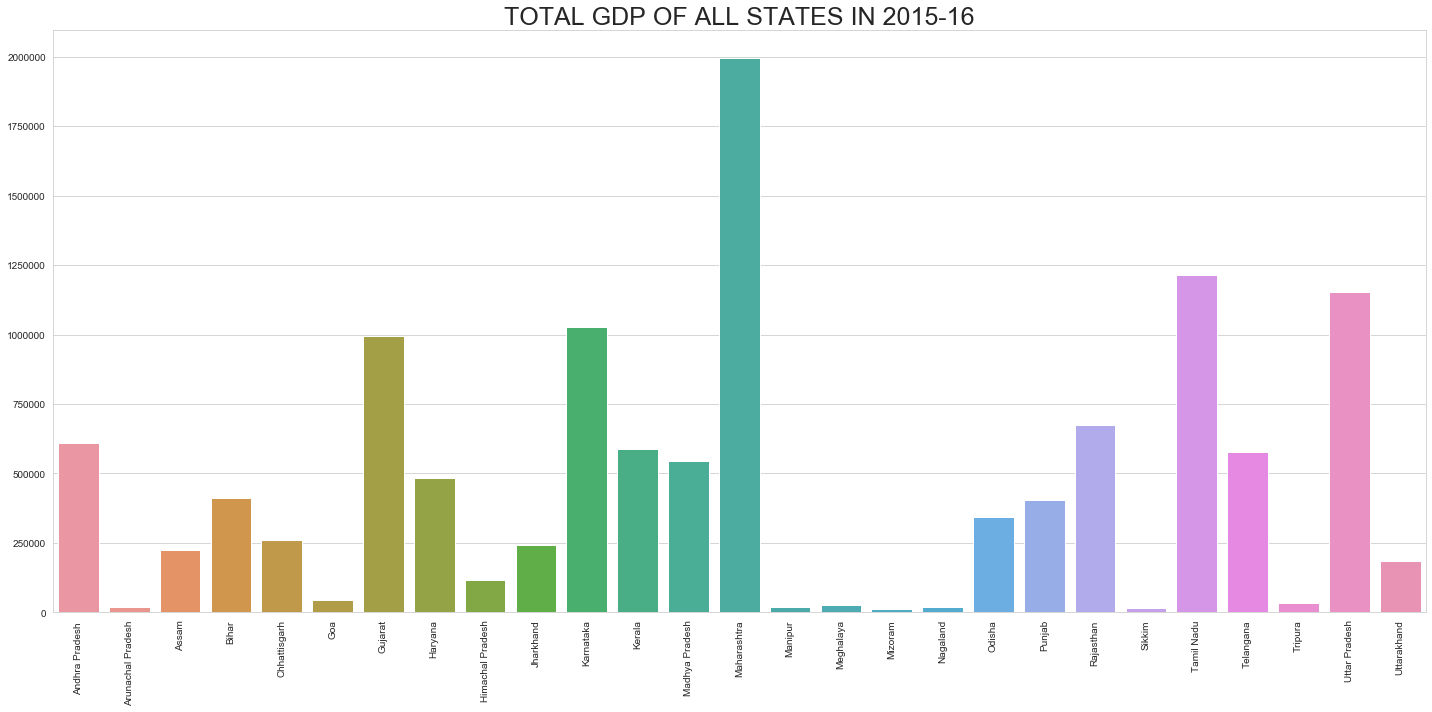

In [15]:
plt.figure(figsize=(20,10))
bp=sns.barplot(data=data[0:6][data[0:6].Duration=='2015-16'][states],estimator=np.sum)
plt.title('TOTAL GDP OF ALL STATES IN 2015-16',fontsize=25)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
print(data[0:6][data[0:6].Duration=='2015-16'][states].sum())

Andhra Pradesh       6.099340e+05
Arunachal Pradesh    1.878400e+04
Assam                2.242340e+05
Bihar                4.135030e+05
Chhattisgarh         2.607760e+05
Goa                  4.500200e+04
Gujarat              9.943160e+05
Haryana              4.851840e+05
Himachal Pradesh     1.162900e+05
Jharkhand            2.419550e+05
Karnataka            1.027068e+06
Kerala               5.883370e+05
Madhya Pradesh       5.439750e+05
Maharashtra          1.994589e+06
Manipur              1.990296e+04
Meghalaya            2.674500e+04
Mizoram              1.321810e+04
Nagaland             2.101953e+04
Odisha               3.418870e+05
Punjab               4.048945e+05
Rajasthan            6.736347e+05
Sikkim               1.663700e+04
Tamil Nadu           1.212668e+06
Telangana            5.756310e+05
Tripura              3.320322e+04
Uttar Pradesh        1.153795e+06
Uttarakhand          1.840910e+05
dtype: float64


#### Top 5 and the Bottom 5 states based on total GDP

<p style="font-family: Arial; font-size:1.0em;color:blue;"> Using Bar Chart to plot the top 5 and bottom 5 states based on GDP because we can visualize all the states in the same plot by differenciating them using colour.</p>

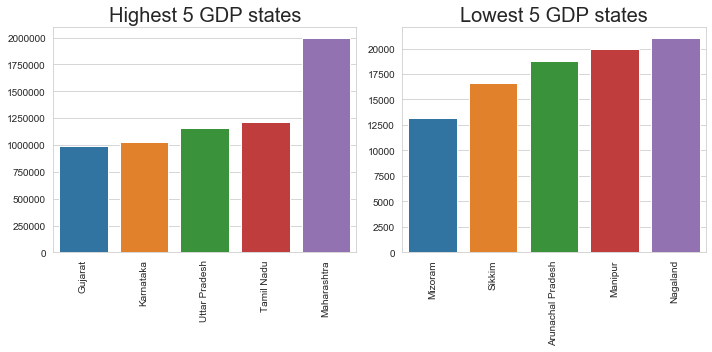

In [17]:
plt.figure(figsize=(10,5))
plt.subplot(121)
bp=sns.barplot(data=data[0:6][data[0:6].Duration=='2015-16'][['Gujarat','Karnataka','Uttar Pradesh','Tamil Nadu','Maharashtra']],estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Highest 5 GDP states',fontsize=20)
plt.subplot(122)
bp=sns.barplot(data=data[0:6][data[0:6].Duration=='2015-16'][['Mizoram','Sikkim','Arunachal Pradesh','Manipur','Nagaland']],estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Lowest 5 GDP states',fontsize=20)
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.2em;color:green;"> Insights from the plot:</p>
<p style="font-family: Arial; font-size:1.0em;color:blue;"> 
North East states' performance is very low when compared to other states.<br>
The lowest 5 states performance based on GDP are the North Eastern states and even in the average GDP % growth over the previous years is also low.<br>
These states has to put in more efforts to increase their GDP for their better future..<br>
There are other states like Goa and Odisha who should also improve their growth rate,but the North eastern States should concentrate more.</p>

# DATA 1-B

In [18]:

os.chdir(path+"\states")

all_states = pd.concat([pd.read_csv(filename, encoding = 'ISO8859', usecols=['S.No.','Item','2014-15']).assign(State = filename.split('-')[1].replace('_',' ')) for filename in glob.glob('*.{}'.format('csv'))])
all_states.fillna(0,inplace=True)
all_states['Item'].replace('*', '', inplace=True)
all_states['Item'].replace('**', '', inplace=True)

#### GDP PER CAPITA FOR ALL STATES

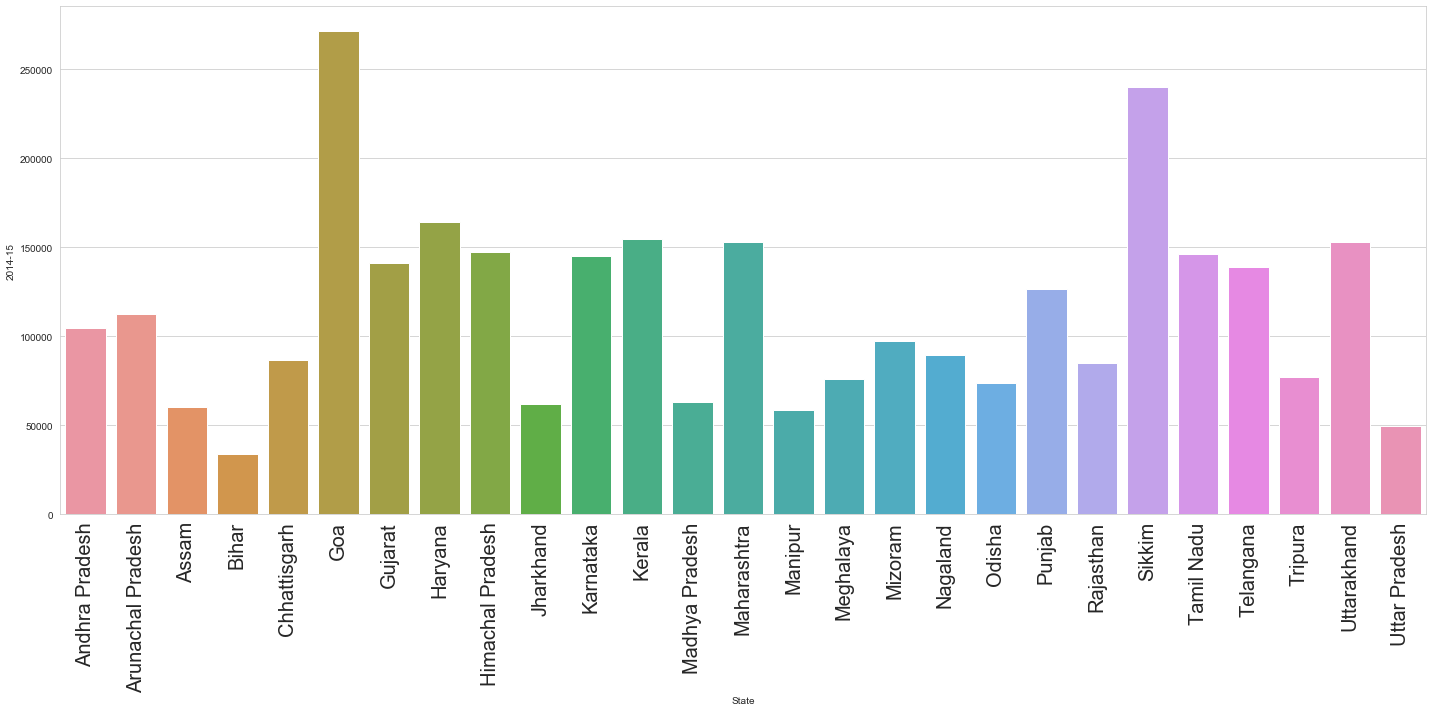

In [19]:
plt.figure(figsize=(20,10))
bp_gdp=sns.barplot(x='State',y='2014-15',data=all_states[all_states.Item=="Per Capita GSDP (Rs.)"])
plt.xticks(rotation=90,fontsize=20)
plt.tight_layout()
plt.show()

In [20]:
print('Below are the details of Top 5 states with lowest GDP per Capita')
print(all_states[all_states.Item=="Per Capita GSDP (Rs.)"].sort_values(by=['2014-15']).head(5))
print('Below are the details of Top 5 states with highest GDP per Capita')
print(all_states[all_states.Item=="Per Capita GSDP (Rs.)"].sort_values(by=['2014-15']).tail(5))

Below are the details of Top 5 states with lowest GDP per Capita
   S.No.                   Item  2014-15          State
32    17  Per Capita GSDP (Rs.)  33954.0          Bihar
32    17  Per Capita GSDP (Rs.)  49450.0  Uttar Pradesh
32    17  Per Capita GSDP (Rs.)  58442.0        Manipur
32    17  Per Capita GSDP (Rs.)  60621.0          Assam
32    17  Per Capita GSDP (Rs.)  62091.0      Jharkhand
Below are the details of Top 5 states with highest GDP per Capita
   S.No.                   Item   2014-15        State
32    17  Per Capita GSDP (Rs.)  153076.0  Uttarakhand
32    17  Per Capita GSDP (Rs.)  154778.0       Kerala
32    17  Per Capita GSDP (Rs.)  164077.0      Haryana
32    17  Per Capita GSDP (Rs.)  240274.0       Sikkim
32    17  Per Capita GSDP (Rs.)  271793.0          Goa


In [21]:
GSDP_low=all_states[all_states.Item=="Per Capita GSDP (Rs.)"].sort_values(by=['2014-15']).head(5)
GSDP_high=all_states[all_states.Item=="Per Capita GSDP (Rs.)"].sort_values(by=['2014-15']).tail(5)

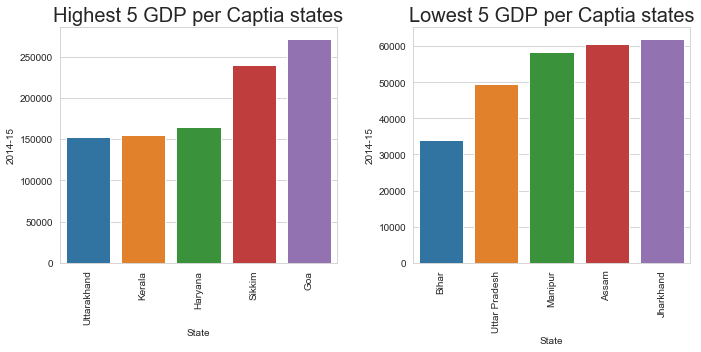

In [22]:
plt.figure(figsize=(10,5))
plt.subplot(121)
bp=sns.barplot(x='State',y='2014-15',data=GSDP_high,estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Highest 5 GDP per Captia states',fontsize=20)
plt.subplot(122)
bp=sns.barplot(x='State',y='2014-15',data=GSDP_low,estimator=np.sum)
plt.xticks(rotation=90)
plt.title('Lowest 5 GDP per Captia states',fontsize=20)
plt.tight_layout()
plt.show()

#### The ratio of the highest per capita GDP to the lowest per capita GDP

In [23]:
print('The ratio of the highest per capita GDP to the lowest per capita GDP is',(all_states['2014-15'][all_states.Item=="Per Capita GSDP (Rs.)"]).max()/(all_states['2014-15'][all_states.Item=="Per Capita GSDP (Rs.)"]).min())

The ratio of the highest per capita GDP to the lowest per capita GDP is 8.004741709371503


#### Percentage contribution of the Primary, Secondary and Tertiary sectors as a percentage of the total GDP for all the states

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We can plot this in 2 ways.<br>1. Stacked Bar chart<br>2. Pie chart for each state</p>

<p style="font-family: Arial; font-size:1.0em;color:blue;"> To plot all the sectors contribution to the total GDP for all states in a single chart, we use Stacked Bar chart.<br> It helps us in visualizing the sector contributions for all states better and helps us in comparing the states better.<br> <br> Where as, Pie charts are used when there are more sectors. <br> <br>As per the assignment, Stacked Bar Chart is preferred than the Pie chart.</p>

##### 1. Stacked Bar Chart

<p style="font-family: Arial; font-size:1.0em;color:blue;"> We First create a dataframe from the 'all states' dataframe  based on the Primary, Secondary and Tertiary sectors for all states.<br> Then create the columns Primary Contribution, Secondary Contribution and Tertiary Contribution by dividing each sector's value with the Total GSVA of the perticular state.</p>

In [25]:
a1=all_states.loc[(all_states['Item']=='Primary')][['State','2014-15']].rename(columns={'2014-15':'Primary'})
a2=all_states.loc[(all_states['Item']=='Secondary')][['State','2014-15']].rename(columns={'2014-15':'Secondary'})
a3=all_states.loc[(all_states['Item']=='Tertiary')][['State','2014-15']].rename(columns={'2014-15':'Tertiary'})
a4=all_states.loc[(all_states['Item']=='TOTAL GSVA at basic prices')][['State','2014-15']].rename(columns={'2014-15':'Total'})
a5=all_states.loc[(all_states['Item']=='Per Capita GSDP (Rs.)')][['State','2014-15']].rename(columns={'2014-15':'Per Capita GSDP'})
a1= pd.merge(a1,a2, how = 'inner', on = 'State')
a1= pd.merge(a1,a3, how = 'inner', on = 'State')
a1= pd.merge(a1,a4, how = 'inner', on = 'State')
a1= pd.merge(a1,a5, how = 'inner', on = 'State')
a1['Primary_contribution']=a1['Primary']*100/a1['Total']
a1['Secondary_contribution']=a1['Secondary']*100/a1['Total']
a1['Tertiary_contribution']=a1['Tertiary']*100/a1['Total']
a1['Percentile']=a1['Per Capita GSDP']*100/a1['Per Capita GSDP'].sum()
a1

State     Primary   Secondary    Tertiary        Total  \
0      Andhra Pradesh  16303716.0  10488884.0  22032942.0   48825542.0   
1   Arunachal Pradesh    716959.0    287489.0    631844.0    1636292.0   
2               Assam   5326697.0   4033091.0   9307109.0   18666897.0   
3               Bihar   8019997.0   5984896.0  22179969.0   36184863.0   
4        Chhattisgarh   6400817.0   8238886.0   7588778.0   22228481.0   
5                 Goa    312129.0   1547536.0   1738217.0    3597882.0   
6             Gujarat  15887187.0  33023538.0  30220377.0   79131102.0   
7             Haryana   8040424.0  12561411.0  19226568.0   39828404.0   
8    Himachal Pradesh   1548366.0   4119162.0   4133326.0    9800853.0   
9           Jharkhand   5248354.0   6241471.0   8133341.0   19623166.0   
10          Karnataka  12066304.0  20484404.0  50490630.0   83041338.0   
11             Kerala   6489442.0  12070040.0  29673778.0   48233259.0   
12     Madhya Pradesh  17854020.0  10044889.0  18117360.0   46016269.0   
13        Maharashtra  21758383.0  47445207.0  88631076.0  157834665.0   
14            Manipur    383140.0    220173.0   1177334.0    1780647.0   
15          Meghalaya    451050.0    637942.0   1200655.0    2289647.0   
16            Mizoram    225598.0    270072.0    637619.0    1133289.0   
17           Nagaland    616178.0    212361.0    992956.0    1821495.0   
18             Odisha   9009306.0   8989693.0  12256258.0   30255256.0   
19             Punjab   9296070.0   7904914.0  16717805.0   33918789.0   
20          Rajasthan  19113780.0  13028794.0  26015812.0   58158386.0   
21             Sikkim    138776.0    845253.0    483103.0    1467133.0   
22         Tamil Nadu  13329774.0  32841892.0  53343788.0   99515453.0   
23          Telangana   9133354.0   9924001.0  28471410.0   47528765.0   
24            Tripura    942216.0    484393.0   1484709.0    2911319.0   
25        Uttarakhand   1845972.0   7642865.0   5587975.0   15076812.0   
26      Uttar Pradesh  25999255.0  25548724.0  45968959.0   97516938.0   

    Per Capita GSDP  Primary_contribution  Secondary_contribution  \
0          104977.0             33.391777               21.482371   
1          112718.0             43.816079               17.569541   
2           60621.0             28.535525               21.605578   
3           33954.0             22.163956               16.539778   
4           86860.0             28.795566               37.064548   
5          271793.0              8.675354               43.012417   
6          141263.0             20.077045               41.732691   
7          164077.0             20.187663               31.538826   
8          147330.0             15.798278               42.028607   
9           62091.0             26.745705               31.806646   
10         145141.0             14.530479               24.667719   
11         154778.0             13.454289               25.024309   
12          62989.0             38.799365               21.828995   
13         152853.0             13.785554               30.060068   
14          58442.0             21.516898               12.364775   
15          76228.0             19.699543               27.862024   
16          97687.0             19.906485               23.830815   
17          89607.0             33.828147               11.658610   
18          73979.0             29.777656               29.712831   
19         126606.0             27.406845               23.305413   
20          84837.0             32.865045               22.402262   
21         240274.0              9.458992               57.612568   
22         146503.0             13.394678               33.001801   
23         139035.0             19.216477               20.879989   
24          77358.0             32.363887               16.638266   
25         153076.0             12.243782               50.692845   
26          49450.0             26.661271               26.199268   

    Tertia

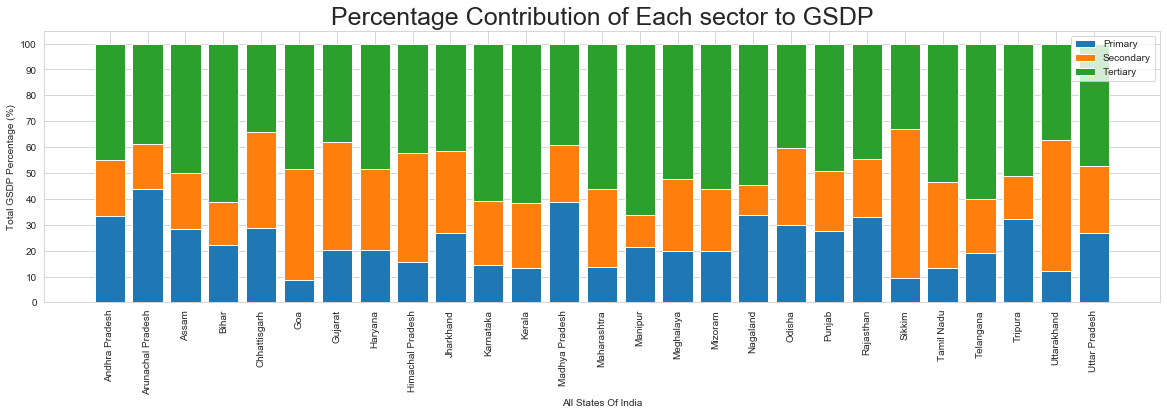

In [26]:
Primary = a1['Primary_contribution']
Secondary = a1['Secondary_contribution']
Tertiary = a1['Tertiary_contribution']
States = a1['State']
plt.figure(figsize=(20,5))
p1 = plt.bar(States, Primary)
p2 = plt.bar(States, Secondary, bottom=Primary)
p3 = plt.bar(States, Tertiary, bottom=np.array(Primary)+np.array(Secondary))
plt.ylabel('Total GSDP Percentage (%)')
plt.title('Percentage Contribution of Each sector to GSDP',fontsize=25)
plt.xticks(States,rotation=90)
plt.yticks(np.arange(0, 110, 10)); plt.xlabel('All States Of India')
plt.legend((p1[0], p2[0], p3[0]), ('Primary', 'Secondary', 'Tertiary'))
plt.show()

##### 2. Pie Chart

<p style="font-family: Arial; font-size:1.0em;color:blue;">
Firstly, we create a Dataframe from all states and then group the dataframe by State.<br>
Then,for each state we plot a pie chart to determine the percentage contribution of each sector to the total GDp of the state.</p>

In [29]:
a=all_states[['Item','2014-15','State']][(all_states['Item']=='Primary') | (all_states['Item']=='Secondary') | (all_states['Item']=='Tertiary') | (all_states['Item']=='Per Capita GSDP (Rs.)') | (all_states['Item']=='TOTAL GSVA at basic prices')]
a.groupby('State')

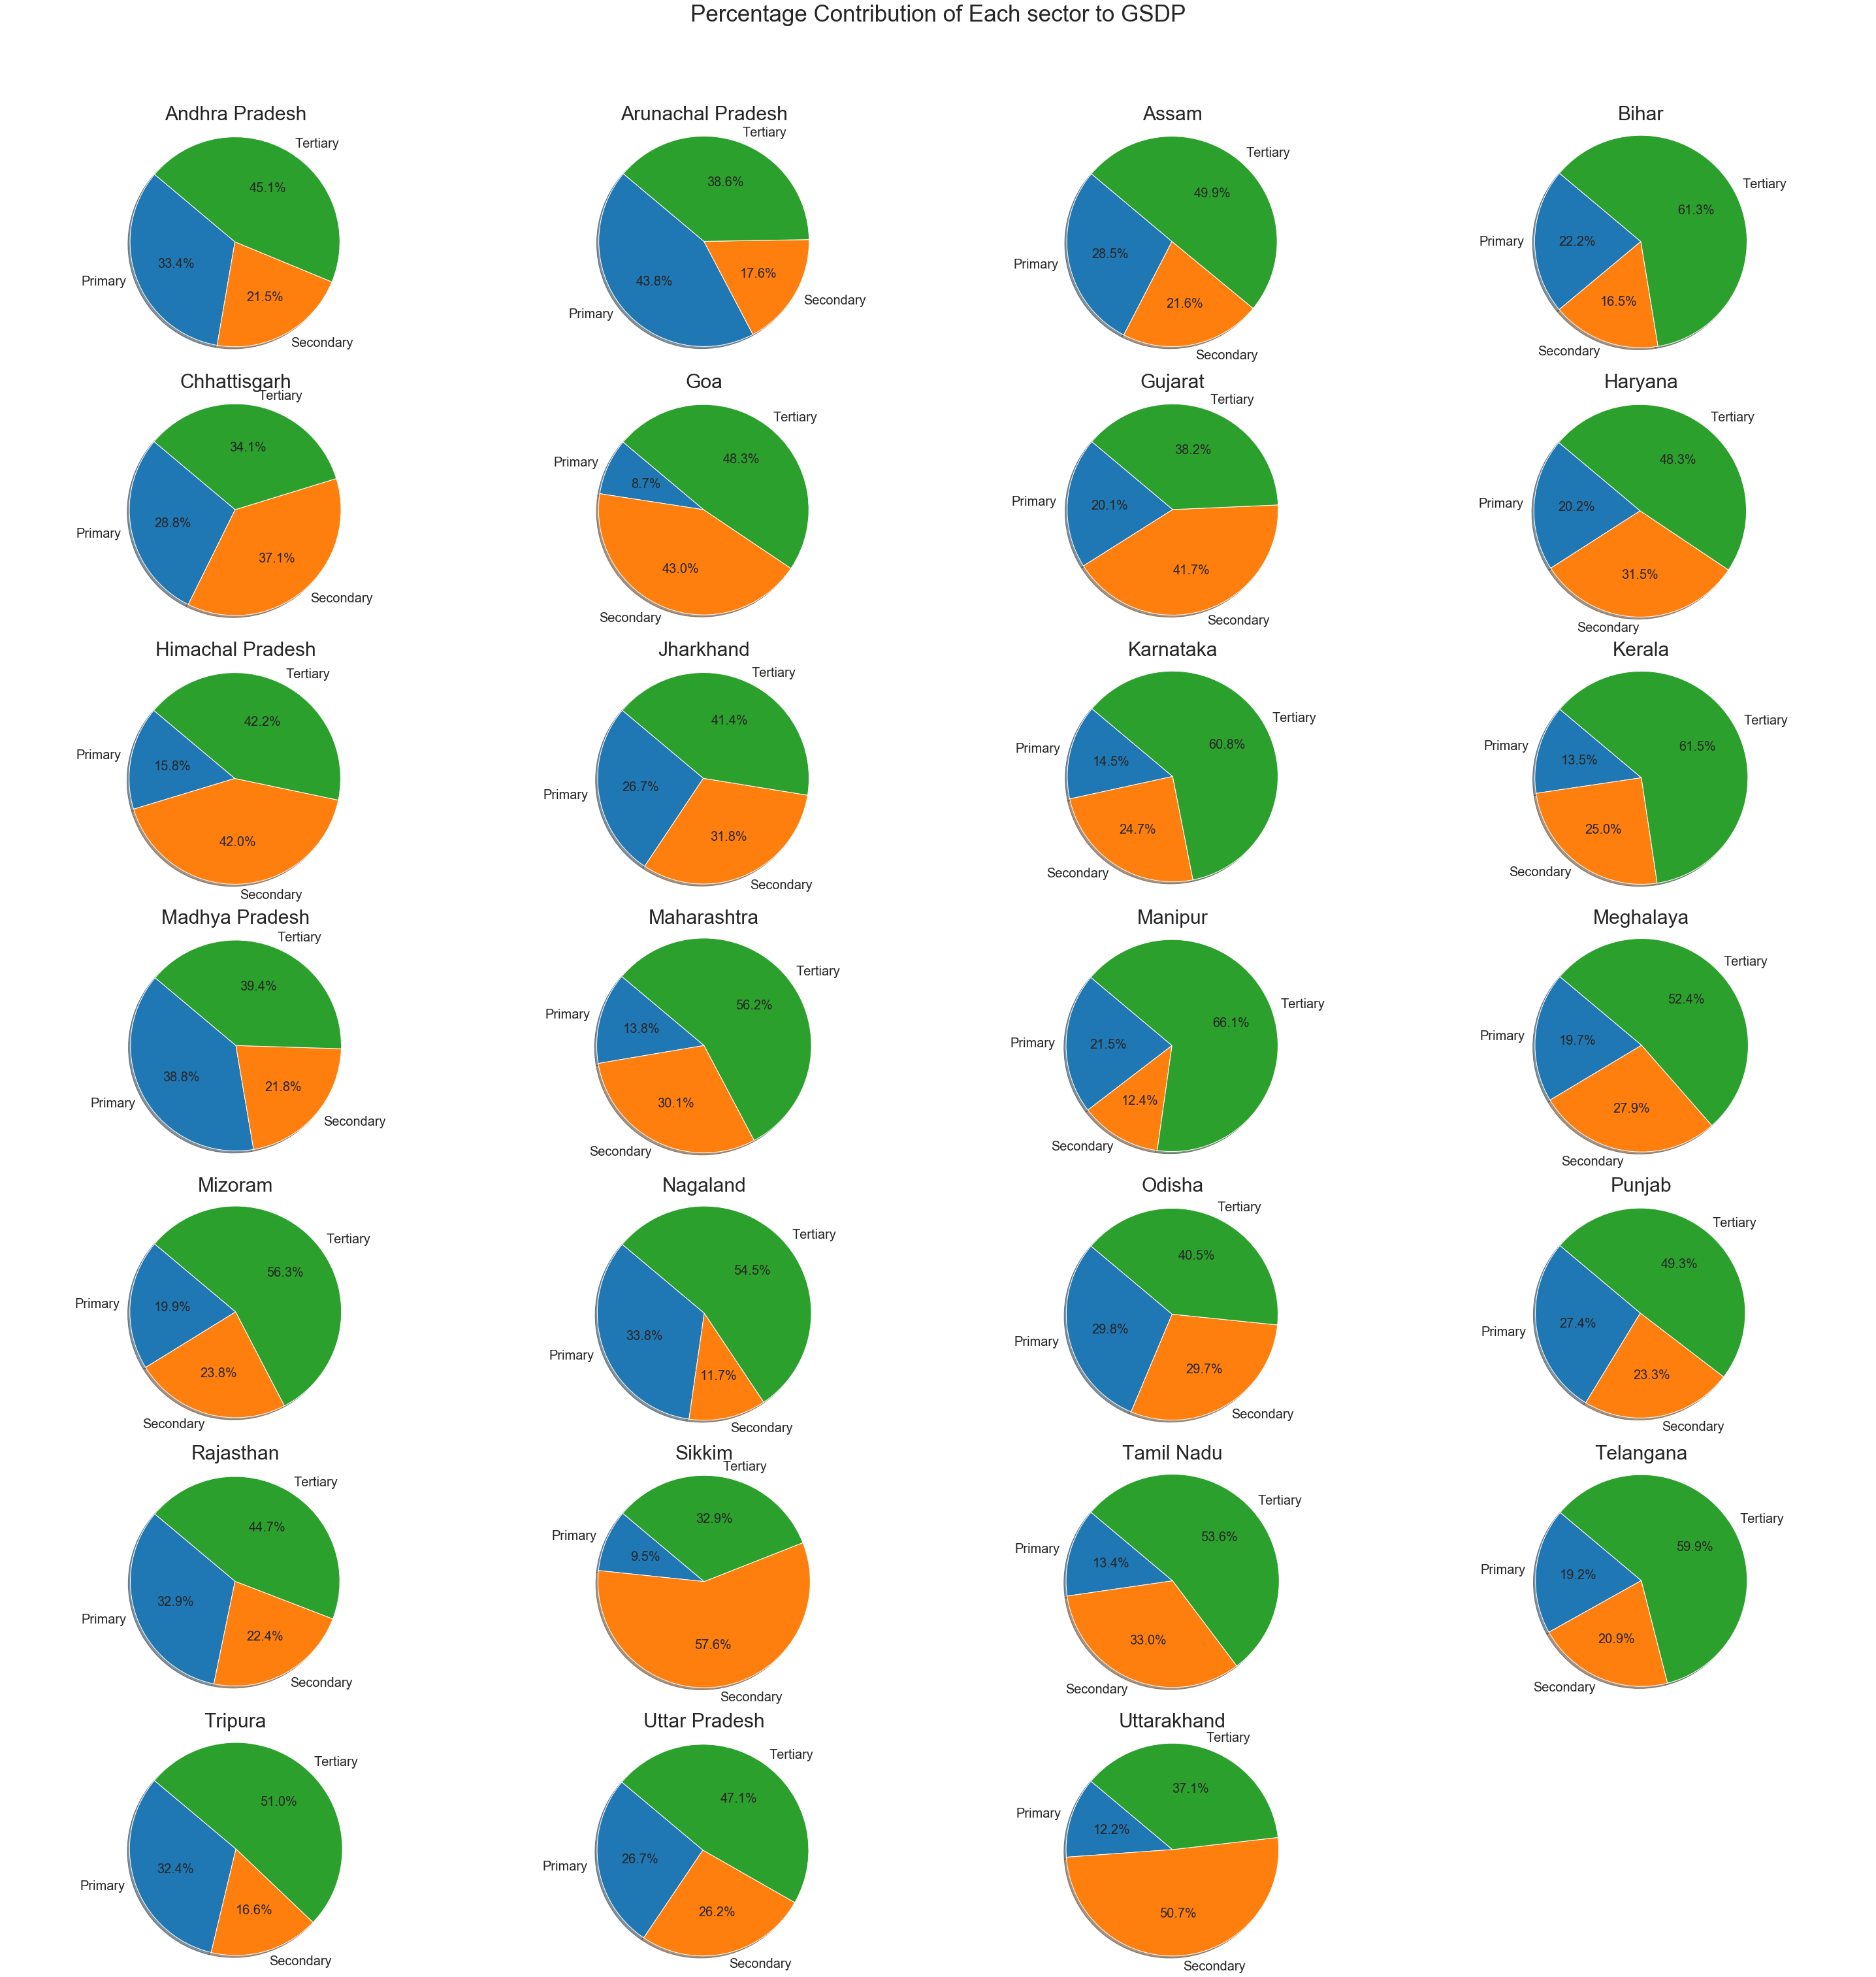

In [27]:
States=['Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh','Goa','Gujarat',
       'Haryana', 'Himachal Pradesh','Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Punjab', 'Rajasthan',
       'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh',
       'Uttarakhand']
fig=plt.figure(figsize=(40,40))
fig.suptitle('Percentage Contribution of Each sector to GSDP',x=0.5, y=1.05,fontsize=35)
j=1
for i in States:
    c=b[['Item','2014-15']].get_group(i)
    labels= 'Primary', 'Secondary', 'Tertiary'
    sizes=list(c['2014-15'][(c['Item']=='Primary') | (c['Item']=='Secondary') | (c['Item']=='Tertiary')])
    plt.subplot(7,4,j)
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140,textprops={'fontsize': 20})
    plt.title(i,fontsize=30)
    j=j+1
    plt.axis('equal')
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;"> The sum of the Primary, Seconday and Tertiary sectors will not be equal the Total GSDP, instead their sum is equal to GSVA. <br> It is because the taxes are laod on the GSVA and then subsidies are deducted from it. Then the value becomes GSDP. </p>

#### correlation of percentile of the state (% of states with lower per capita GDP) and %contribution of Primary sector to total GDP

In [28]:
print(a1[['Primary_contribution','Percentile']].corr())

                      Primary_contribution  Percentile
Primary_contribution              1.000000   -0.663313
Percentile                       -0.663313    1.000000


<p style="font-family: Arial; font-size:1.0em;color:blue;"> The correlation coefficient tells that if eiether of percentage contribution of primary sector to the total GDP or the Per captia GDP of a state increases or decreases, the other behaves oppositely for almost 60 percent of the time.</p>

In [29]:
print(a1[['Secondary_contribution','Percentile']].corr())
print(a1[['Tertiary_contribution','Percentile']].corr())

                        Secondary_contribution  Percentile
Secondary_contribution                1.000000    0.669617
Percentile                            0.669617    1.000000
                       Tertiary_contribution  Percentile
Tertiary_contribution                 1.0000     -0.1564
Percentile                           -0.1564      1.0000


<p style="font-family: Arial; font-size:1.0em;color:blue;">The correlation coefficient tells that if eiether of percentage contribution of Secondary sector to the total GDP or the Per captia GDP of a state increases or decreases, the other similarly for almost 60 percent of the time.<br>
The correlation coefficient tells that if eiether of percentage contribution of primary sector to the total GDP or the Per captia GDP of a state increases or decreases, the other behaves oppositely for most of the time.</p>

#### Categorise the states into four groups based on the GDP per capita 

<p style="font-family: Arial; font-size:1.0em;color:blue;">
To Categorise the states into four groups based on the GDP per capita (C1, C2, C3, C4, where C1 would have the highest per capita GDP and C4, the lowest),<br>we create a new dataframe c, with the Item value equals to Per Capita GSDP (Rs.).<br> Then,we catagorize the states as per the quantiles and look it up across the states in all states dataframe. </p>

In [30]:
c=all_states[['State','2014-15']][all_states['Item']=='Per Capita GSDP (Rs.)']

In [31]:
c.loc[c['2014-15'] <= c['2014-15'].quantile(0.2), 'Category'] = 'C4'
c.loc[(c['2014-15'] > c['2014-15'].quantile(0.2))&(c['2014-15'] <= c['2014-15'].quantile(0.5)), 'Category'] = 'C3'
c.loc[(c['2014-15'] > c['2014-15'].quantile(0.5))&(c['2014-15'] <= c['2014-15'].quantile(0.85)), 'Category'] = 'C2'
c.loc[(c['2014-15'] > c['2014-15'].quantile(0.85))&(c['2014-15'] <= c['2014-15'].quantile(1)), 'Category'] = 'C1'

In [32]:
key_list = list(all_states['State'])
dict_lookup = dict(zip(c['State'], c['Category']))
all_states['Category'] = [dict_lookup[item] for item in key_list]
print(all_states)

   S.No.                               Item      2014-15           State  \
0      1  Agriculture, forestry and fishing   14819416.0  Andhra Pradesh   
1    1.1                              Crops    7893514.0  Andhra Pradesh   
2    1.2                          Livestock    4309078.0  Andhra Pradesh   
3    1.3               Forestry and logging     346160.0  Andhra Pradesh   
4    1.4            Fishing and aquaculture    2270664.0  Andhra Pradesh   
..   ...                                ...          ...             ...   
28    13                  Taxes on Products   10107396.0   Uttar Pradesh   
29    14              Subsidies on products    3287219.0   Uttar Pradesh   
30    15       Gross State Domestic Product  104337115.0   Uttar Pradesh   
31    16                   Population ('00)    2109940.0   Uttar Pradesh   
32    17              Per Capita GSDP (Rs.)      49450.0   Uttar Pradesh   

   Category  
0        C3  
1        C3  
2        C3  
3        C3  
4        C3  
.. 

#### Sub-sectors that contribute to approximately 80% of the GSDP of each category

<p style="font-family: Arial; font-size:1.0em;color:blue;">For finding the top 3/4/5 sub-sectors (such as agriculture, forestry and fishing, crops, manufacturing etc., not primary, secondary and tertiary) that contribute to approximately 80% of the GSDP of each category,<br> we create a data frame k from all states while aggreagate the values of all the subsectors for each category.</p>

In [33]:
k=all_states[['S.No.','Item','2014-15','Category']]
k

S.No.                               Item      2014-15 Category
0      1  Agriculture, forestry and fishing   14819416.0       C3
1    1.1                              Crops    7893514.0       C3
2    1.2                          Livestock    4309078.0       C3
3    1.3               Forestry and logging     346160.0       C3
4    1.4            Fishing and aquaculture    2270664.0       C3
..   ...                                ...          ...      ...
28    13                  Taxes on Products   10107396.0       C4
29    14              Subsidies on products    3287219.0       C4
30    15       Gross State Domestic Product  104337115.0       C4
31    16                   Population ('00)    2109940.0       C4
32    17              Per Capita GSDP (Rs.)      49450.0       C4

[891 rows x 4 columns]

In [34]:
s=(k['2014-15'].groupby([k['Category'], k['Item']])).sum().unstack()
s=s[['Agriculture, forestry and fishing','Mining and quarrying',
       'Manufacturing','Electricity, gas, water supply & other utility services','Construction',
       'Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services'
       ,'TOTAL GSVA at basic prices','Gross State Domestic Product','Per Capita GSDP (Rs.)']].T
s

Category                                                     C1           C2  \
Item                                                                           
Agriculture, forestry and fishing                    14391809.0   75209022.0   
Mining and quarrying                                   588961.0   10373346.0   
Manufacturing                                        13758793.0  109196530.0   
Electricity, gas, water supply & other utility ...    2000998.0   13823378.0   
Construction                                         11264451.0   40653562.0   
Trade, repair, hotels and restaurants                13995159.0   61238862.0   
Transport, storage, communication & services re...    6818560.0   33749808.0   
Financial services                                    3936489.0   36296642.0   
Real estate, ownership of dwelling & profession...   14740245.0   92121446.0   
Public administration                                 3571292.0   18567815.0   
Other services                                        8059922.0   36253657.0   
TOTAL GSVA at basic prices                           93126678.0  527484069.0   
Gross State Domestic Product                        101930677.0  586380452.0   
Per Capita GSDP (Rs.)                                  830922.0    1264525.0   

Category                                                     C3           C4  
Item                                                                          
Agriculture, forestry and fishing                    42226888.0   56735044.0  
Mining and quarrying                                 10835771.0    6096419.0  
Manufacturing                                        22038331.0   24987032.0  
Electricity, gas, water supply & other utility ...    4604774.0    4310264.0  
Construction                                         15707921.0   22775948.0  
Trade, repair, hotels and restaurants                17245309.0   27484595.0  
Transport, storage, communication & services re...   12231484.0   16191800.0  
Financial services                                    5766226.0    7684498.0  
Real estate, ownership of dwelling & profession...   16224118.0   24177534.0  
Public administration                                 7927173.0   13486630.0  
Other services                                       12815417.0   15859015.0  
TOTAL GSVA at basic prices                          167623415.0  219788780.0  
Gross State Domestic Product                        177966387.0  233252066.0  
Per Capita GSDP (Rs.)                                  691533.0     327547.0

#### Percentage contribution of sub-sectors to each Category

In [35]:
s['C1']=(s['C1']/(s.loc['TOTAL GSVA at basic prices']['C1']))*100
s['C2']=(s['C2']/(s.loc['TOTAL GSVA at basic prices']['C2']))*100
s['C3']=(s['C3']/(s.loc['TOTAL GSVA at basic prices']['C3']))*100
s['C4']=(s['C4']/(s.loc['TOTAL GSVA at basic prices']['C4']))*100
s

Category                                                    C1          C2  \
Item                                                                         
Agriculture, forestry and fishing                    15.454013   14.258065   
Mining and quarrying                                  0.632430    1.966570   
Manufacturing                                        14.774277   20.701389   
Electricity, gas, water supply & other utility ...    2.148684    2.620625   
Construction                                         12.095837    7.707069   
Trade, repair, hotels and restaurants                15.028088   11.609614   
Transport, storage, communication & services re...    7.321812    6.398261   
Financial services                                    4.227026    6.881088   
Real estate, ownership of dwelling & profession...   15.828166   17.464309   
Public administration                                 3.834875    3.520071   
Other services                                        8.654794    6.872939   
TOTAL GSVA at basic prices                          100.000000  100.000000   
Gross State Domestic Product                        109.453788  111.165528   
Per Capita GSDP (Rs.)                                 0.892249    0.239728   

Category                                                    C3          C4  
Item                                                                        
Agriculture, forestry and fishing                    25.191521   25.813440  
Mining and quarrying                                  6.464354    2.773763  
Manufacturing                                        13.147525   11.368657  
Electricity, gas, water supply & other utility ...    2.747095    1.961094  
Construction                                          9.370959   10.362653  
Trade, repair, hotels and restaurants                10.288127   12.505004  
Transport, storage, communication & services re...    7.297002    7.366982  
Financial services                                    3.439988    3.496310  
Real estate, ownership of dwelling & profession...    9.678909   11.000350  
Public administration                                 4.729156    6.136178  
Other services                                        7.645362    7.215571  
TOTAL GSVA at basic prices                          100.000000  100.000000  
Gross State Domestic Product                        106.170362  106.125557  
Per Capita GSDP (Rs.)                                 0.412552    0.149028

<p style="font-family: Arial; font-size:1.0em;color:blue;">
C1 - Agriculture, forestry and fishing & Manufacturing & Trade, repair, hotels and restaurants & Real estate, ownership of dwelling & professional services	& Other services & Construction - 81.83% (approx)<br>
C2 - Agriculture, forestry and fishing & Manufacturing & Trade, repair, hotels and restaurants & Construction &
Real estate, ownership of dwelling & professional services	& Financial Services - 78.62% (approx)<br>
C3 - Agriculture, forestry and fishing & Manufacturing & Trade, repair, hotels and restaurants & Construction & 
Real estate,  ownership of dwelling & professional services	& 	& Other services - 75.322% (approx)<br>
C4 - Agriculture, forestry and fishing & Manufacturing & Trade, repair, hotels and restaurants & Construction & 
Real estate,  ownership of dwelling & professional services & Transport, storage, communication & services related to broadcasting - 78.4% (approx)</p>

#### Contribution of the sub-sectors as a percentage of the GSDP of each category

<p style="font-family: Arial; font-size:1.0em;color:blue;">we plot the pie charts for all the four catagories and  thesubsectors because as the number of sectors are more, stacked bar chart will is nota correct way to visualize it. Pie chart viualizes it the best!</p>

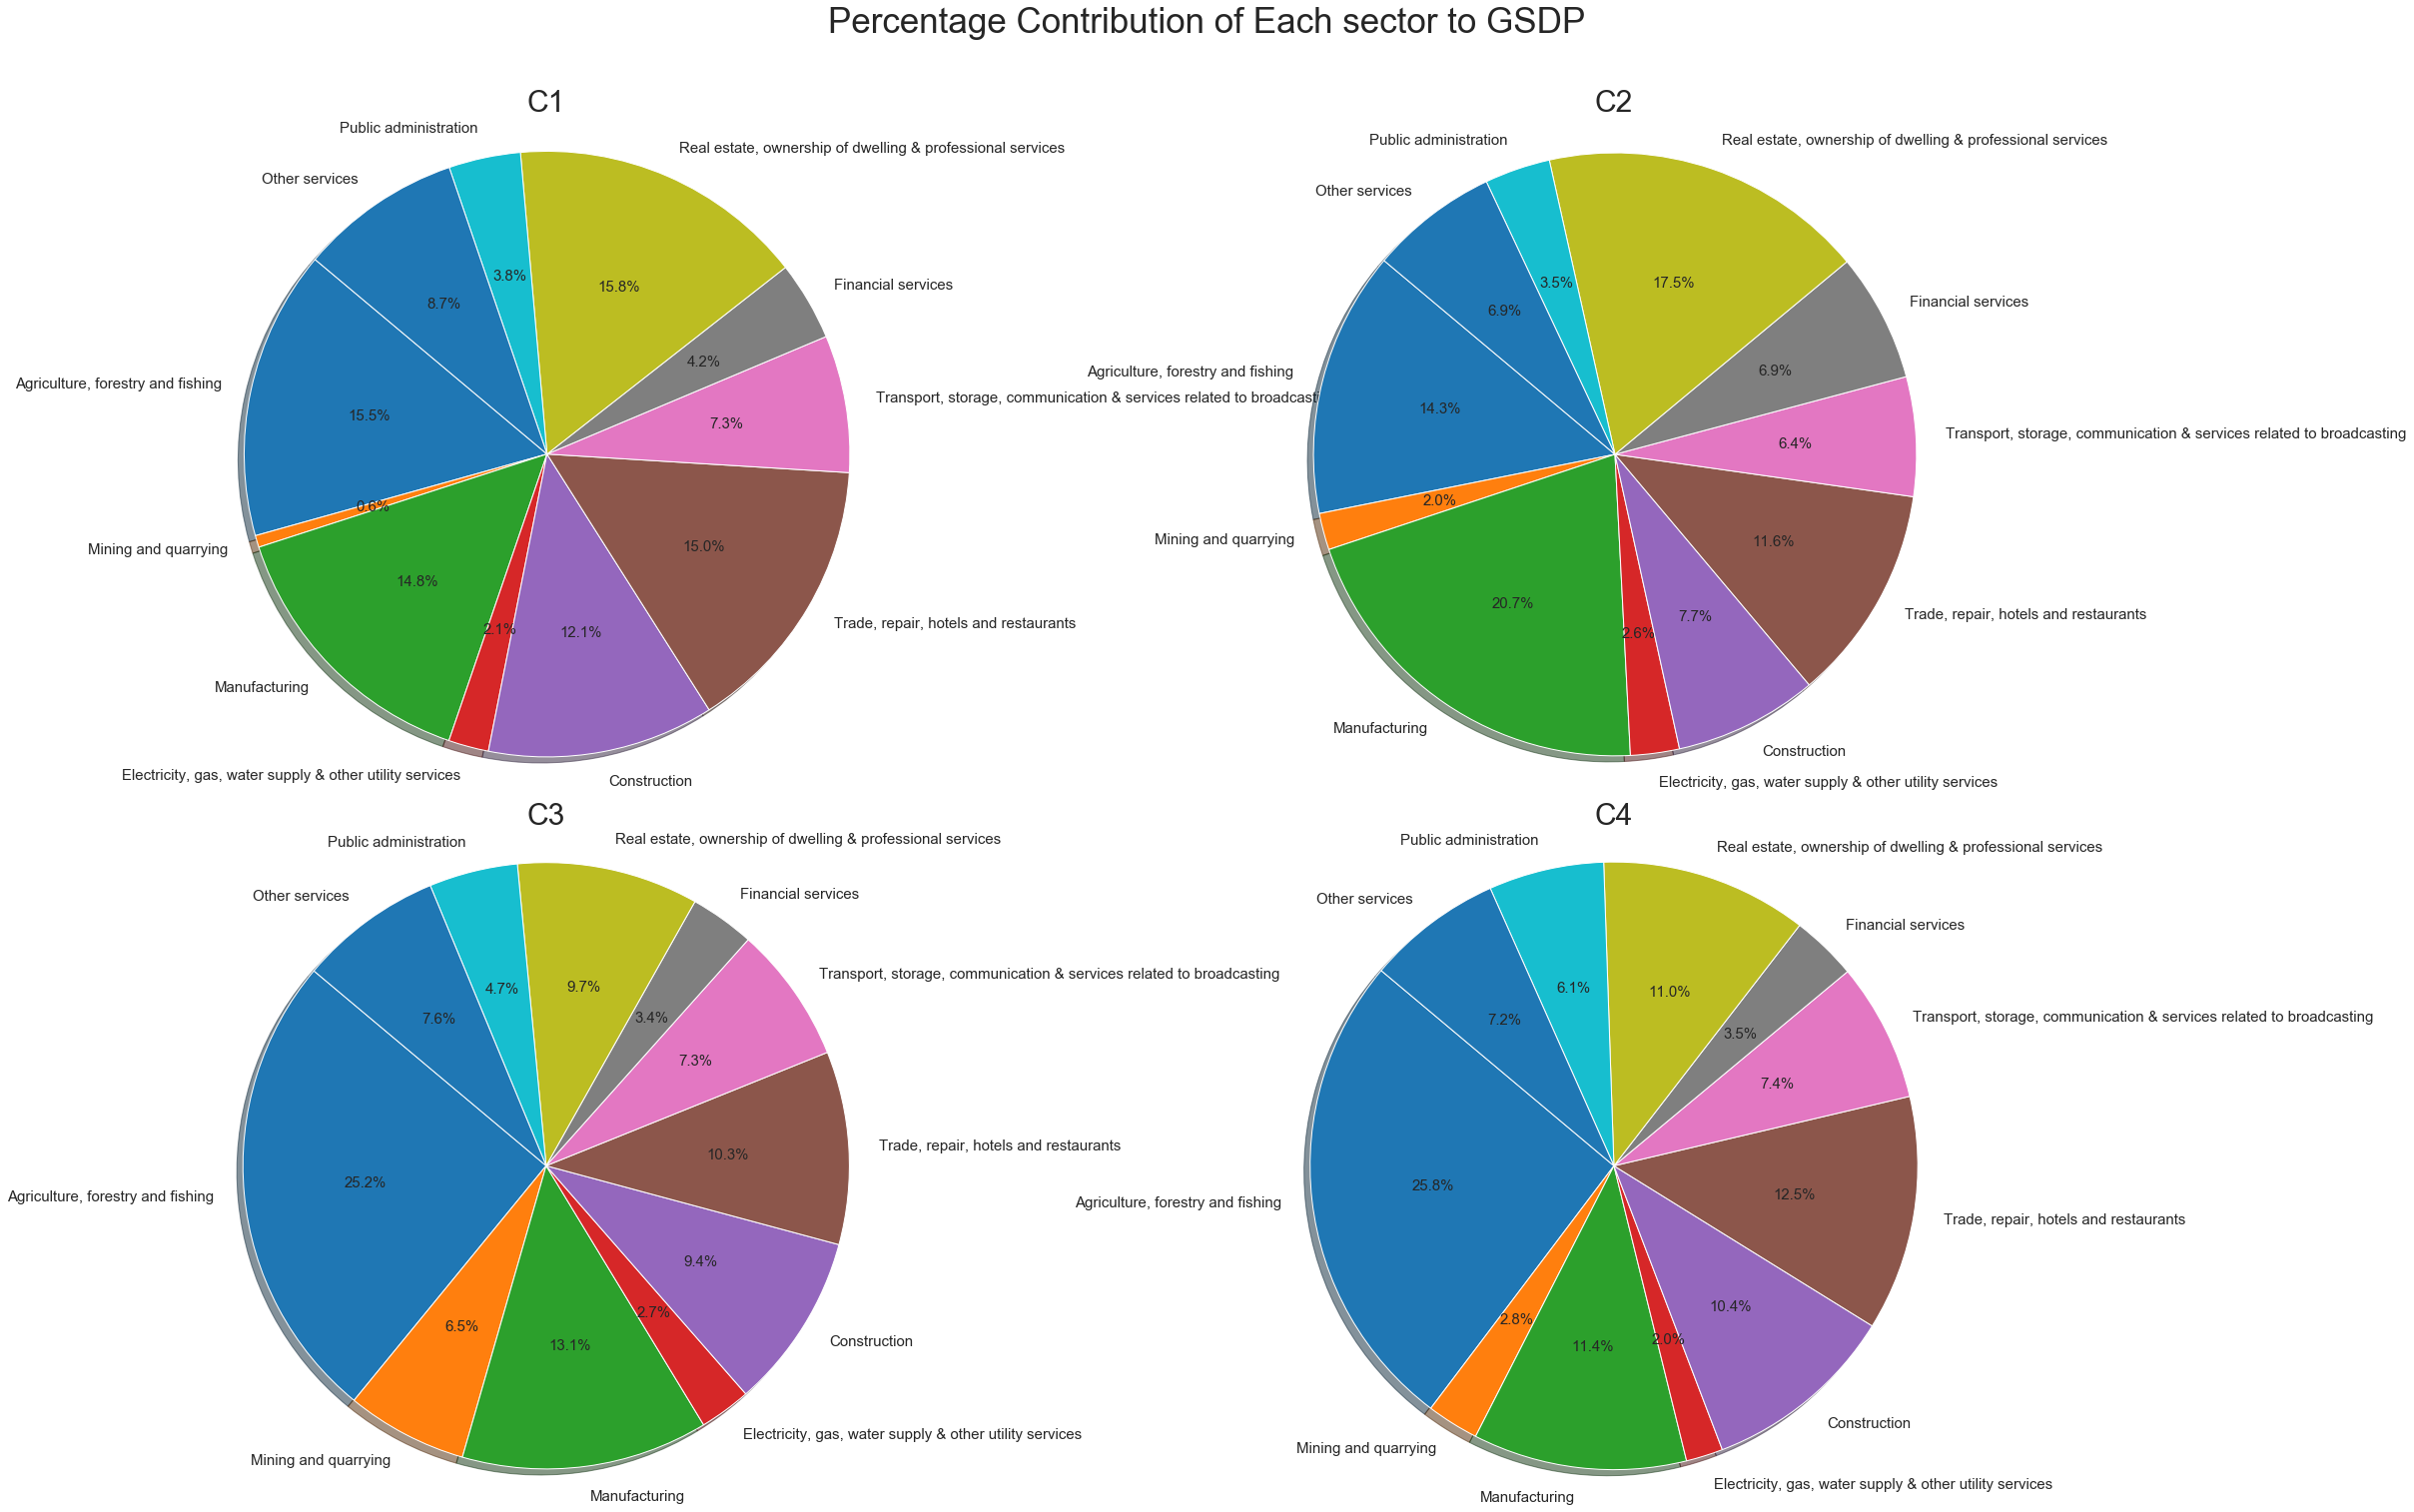

In [36]:
Catagories=['C1','C2','C3','C4']
labels= 'Agriculture, forestry and fishing','Mining and quarrying', 'Manufacturing','Electricity, gas, water supply & other utility services','Construction','Trade, repair, hotels and restaurants','Transport, storage, communication & services related to broadcasting','Financial services','Real estate, ownership of dwelling & professional services','Public administration','Other services'
fig=plt.figure(figsize=(30,20))
fig.suptitle('Percentage Contribution of Each sector to GSDP',x=0.5, y=1.05,fontsize=35)
m=1
for i in Catagories:
    l=[]
    for j in labels:
        l.append(s.loc[j][i])
    plt.subplot(2,2,m)

    plt.pie(l, labels=labels,shadow=True,autopct='%1.1f%%', startangle=140,textprops={'fontsize': 15})
    plt.title(i,fontsize=30)
    m=m+1
    plt.axis('equal')
plt.tight_layout()
plt.show()

#### GDP distribution of the top states (C1) differ from the others

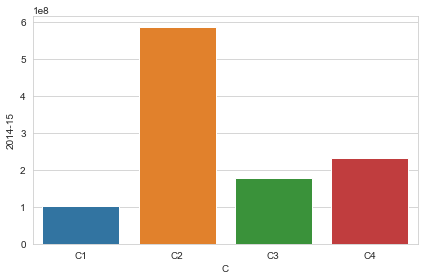

In [37]:
f=all_states[['Category','2014-15']][all_states['Item']=='Gross State Domestic Product'].groupby('Category').sum()
f["C"]='C1','C2','C3','C4'
sns.barplot(f['C'],f['2014-15'],estimator=np.sum)
plt.tight_layout()
plt.show()

#### Correlation between Subsectors and high GDP

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the plot 'Percentage contribution of sub-sectors to each Category', the sub-sectors which are correlated with high GDP are: <br> 1. Agriculture,forestry and fishing  <br>2. Manufacturing <br>3. Trade, repair, hotels and restaurants <br>4. Real estate,ownership of dwelling <br>5. Construction</p>

#### sub-sectors that  various categories need to focus on

<p style="font-family: Arial; font-size:1.0em;color:blue;">From the plot 'Percentage contribution of sub-sectors to each Category', find the details below for the sub sectors that various catagories need to focus on :<br>
C1:<br>
Mining and quarrying<br>
Electricity, gas, water supply & other utility services<br>
Public administration<br>
Financial services<br>
Transport, storage, communication & services related to broadcasting<br>
C2:<br>
Mining and quarrying<br>
Electricity, gas, water supply & other utility services<br>
Public administration<br>
Transport, storage, communication & services related to broadcasting<br>
Other services<br>
Financial services<br>
C3:<br>
Electricity, gas, water supply & other utility services<br>
Financial services<br>
Public administration<br>
Mining and quarrying<br>
Transport, storage, communication & services related to broadcasting<br>
C4:<br>
Electricity, gas, water supply & other utility services<br>
Mining and quarrying<br>
Financial services<br>
Public administration<br>
Other services<br>
Transport, storage, communication & services related to broadcasting<br></p>

<p style="font-family: Arial; font-size:1.0em;color:blue;">
Recommendation 1:
</p>
For all the catagories, sub-sectorslike (Electricity, gas, water supply & other utility services, transporation) and are contributing very less to GSDP even though they are highly utilized by the people. So,the government should find the root cause for this and try to  overcome to improve the Per captia.
<p style="font-family: Arial; font-size:1.0em;color:blue;">
Recommendation 2:
</p>
For the sub-sectors which are performing bad in some catagories, we can get the insights from the the ones where they are performing well(example: Mining and quarrying). It is performing well in C3 but not in others. So, we can get the inputs from those states and try to append them in others.
<p style="font-family: Arial; font-size:1.0em;color:blue;">
Recommendation 3:
</p>
For States where the GDP is more but the percaptia income is less due to high population, we should try to improve the the GDP as per the population.  For such conditions,the services should be improved so that the returns will increase.This will improve the GDP per captia.

# PART 2

In [38]:
path
os.chdir(path)
dropout=pd.read_csv(os.getcwd()+r'\rs_session243_au570_1.1.csv')

In [39]:
dropout=dropout[['Level of Education - State','Primary - 2014-2015.1','Upper Primary - 2014-2015','Secondary - 2014-2015','Senior Secondary - 2014-2015']]
dropout.rename(columns = {'Level of Education - State':'State','Primary - 2014-2015.1':'Primary drop rate','Upper Primary - 2014-2015':'Upper Primary drop rate','Secondary - 2014-2015':'Secondary drop rate','Senior Secondary - 2014-2015':'Senior Secondary drop rate'}, inplace = True) 
dropout.replace(['Chhatisgarh','Uttrakhand'],['Chhattisgarh','Uttarakhand'],inplace=True)
dropout=dropout[(dropout['State']!='A & N Islands')&(dropout['State']!='Dadra & Nagar Haveli')&(dropout['State']!='Daman & Diu')&(dropout['State']!='Delhi')&(dropout['State']!='Chandigarh')&(dropout['State']!='Jammu and Kashmir')&(dropout['State']!='Puducherry')&(dropout['State']!='Lakshadweep')&(dropout['State']!='West Bengal')&(dropout['State']!='All India')]
#drop the Union territories 
dropout

State  Primary drop rate  Upper Primary drop rate  \
1      Andhra Pradesh               6.72                     5.20   
2   Arunachal Pradesh              10.82                     6.71   
3               Assam              15.36                    10.51   
4               Bihar                NaN                     4.08   
6        Chhattisgarh               2.91                     5.85   
10                Goa               0.73                     0.07   
11            Gujarat               0.89                     6.41   
12            Haryana               5.61                     5.81   
13   Himachal Pradesh               0.64                     0.87   
15          Jharkhand               5.48                     8.99   
16          Karnataka               2.02                     3.85   
17             Kerala                NaN                      NaN   
19     Madhya Pradesh               6.59                     9.20   
20        Maharashtra               1.26                     1.79   
21            Manipur               9.66                     4.20   
22          Meghalaya               9.46                     6.52   
23            Mizoram              10.10                     4.78   
24           Nagaland               5.61                     7.92   
25             Odisha               2.86                     3.81   
27             Punjab               3.05                     3.22   
28          Rajasthan               5.02                     3.07   
29             Sikkim               2.27                     1.57   
30         Tamil Nadu                NaN                      NaN   
31          Telangana               2.08                     2.30   
32            Tripura               1.28                     1.99   
33      Uttar Pradesh               8.58                     2.70   
34        Uttarakhand               4.04                     1.19   

    Secondary drop rate  Senior Secondary drop rate  
1                 15.71                         NaN  
2                 17.11                       18.42  
3                 27.06                         NaN  
4                 25.90                         NaN  
6                 21.26                        2.76  
10                11.15                       13.91  
11                25.04                        7.04  
12                15.89                        5.75  
13                 6.07                        7.41  
15                24.00                        3.41  
16                26.18                        1.96  
17                12.32                        0.47  
19                24.77                         NaN  
20                12.87                        1.83  
21                14.38                         NaN  
22                20.52                         NaN  
23                21.88                        6.91  
24                18.23                        6.97  
25                29.56                         NaN  
27                 8.86                        5.83  
28                13.48                         NaN  
29                15.89                       11.76  
30                 8.10                        3.41  
31                15.53                        0.77  
32                28.42                        8.93  
33                10.22                        2.10  
34                10.40                        3.01

In [40]:
q=all_states[['State','2014-15','Item']][(all_states['Item']=='Per Capita GSDP (Rs.)') | (all_states['Item']=='Primary') | (all_states['Item']=='Secondary') | (all_states['Item']=="Population ('00)") | (all_states['Item']=='Tertiary') | (all_states['Item']=='Gross State Domestic Product')]
dropout=pd.merge(dropout,a1[['State','Primary_contribution']],on="State",how='inner')
dropout=pd.merge(dropout,a1[['State','Secondary_contribution']],on="State",how='inner')
dropout=pd.merge(dropout,a1[['State','Tertiary_contribution']],on="State",how='inner')
dropout=pd.merge(dropout,q[['State','2014-15']][q['Item']=='Per Capita GSDP (Rs.)'],on="State",how='inner')
dropout.rename(columns={'2014-15':'GDPPC'},inplace=True)
dropout=pd.merge(dropout,q[['State','2014-15']][q['Item']=='Gross State Domestic Product'],on="State",how='inner')
dropout.rename(columns={'2014-15':'Gross State Domestic Product'},inplace=True)
dropout=pd.merge(dropout,q[['State','2014-15']][q['Item']=="Population ('00)"],on="State",how='inner')
dropout.rename(columns={'2014-15':"Population"},inplace=True) # merging all the requiored dataframes based on states
dropout.fillna(0,inplace=True)#filling the null values with zero
dropout

State  Primary drop rate  Upper Primary drop rate  \
0      Andhra Pradesh               6.72                     5.20   
1   Arunachal Pradesh              10.82                     6.71   
2               Assam              15.36                    10.51   
3               Bihar               0.00                     4.08   
4        Chhattisgarh               2.91                     5.85   
5                 Goa               0.73                     0.07   
6             Gujarat               0.89                     6.41   
7             Haryana               5.61                     5.81   
8    Himachal Pradesh               0.64                     0.87   
9           Jharkhand               5.48                     8.99   
10          Karnataka               2.02                     3.85   
11             Kerala               0.00                     0.00   
12     Madhya Pradesh               6.59                     9.20   
13        Maharashtra               1.26                     1.79   
14            Manipur               9.66                     4.20   
15          Meghalaya               9.46                     6.52   
16            Mizoram              10.10                     4.78   
17           Nagaland               5.61                     7.92   
18             Odisha               2.86                     3.81   
19             Punjab               3.05                     3.22   
20          Rajasthan               5.02                     3.07   
21             Sikkim               2.27                     1.57   
22         Tamil Nadu               0.00                     0.00   
23          Telangana               2.08                     2.30   
24            Tripura               1.28                     1.99   
25      Uttar Pradesh               8.58                     2.70   
26        Uttarakhand               4.04                     1.19   

    Secondary drop rate  Senior Secondary drop rate  Primary_contribution  \
0                 15.71                        0.00             33.391777   
1                 17.11                       18.42             43.816079   
2                 27.06                        0.00             28.535525   
3                 25.90                        0.00             22.163956   
4                 21.26                        2.76             28.795566   
5                 11.15                       13.91              8.675354   
6                 25.04                        7.04             20.077045   
7                 15.89                        5.75             20.187663   
8                  6.07                        7.41             15.798278   
9                 24.00                        3.41             26.745705   
10                26.18                        1.96             14.530479   
11                12.32                        0.47             13.454289   
12                24.77                        0.00             38.799365   
13                12.87                        1.83             13.785554   
14                14.38                        0.00             21.516898   
15                20.52                        0.00             19.699543   
16                21.88                        6.91             19.906485   
17                18.23                        6.97             33.828147   
18                29.56                        0.00             29.777656   
19                 8.86                        5.83             27.406845   
20                13.48                        0.00             32.865045   
21                15.89                       11.76              9.458992   
22                 8.10                        3.41             13.394678   
23                15.53                        0.77             19.216477   
24                28.42                        8.93             32.363887   
25                10.22                        2.10             26.661271   
26  

#### Correlation between GDPPC and Dropout rates in education (primary, upper primary and secondary) for all states 

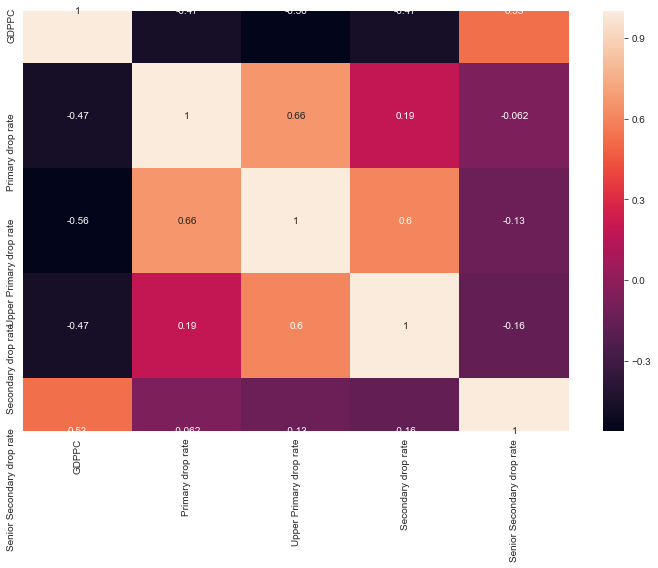

In [41]:
plt.figure(figsize=(10,8))
sns.heatmap(dropout[['GDPPC','Primary drop rate', 'Upper Primary drop rate', 'Secondary drop rate', 'Senior Secondary drop rate']].corr(method="pearson"),annot=True)
plt.tight_layout()
plt.show()

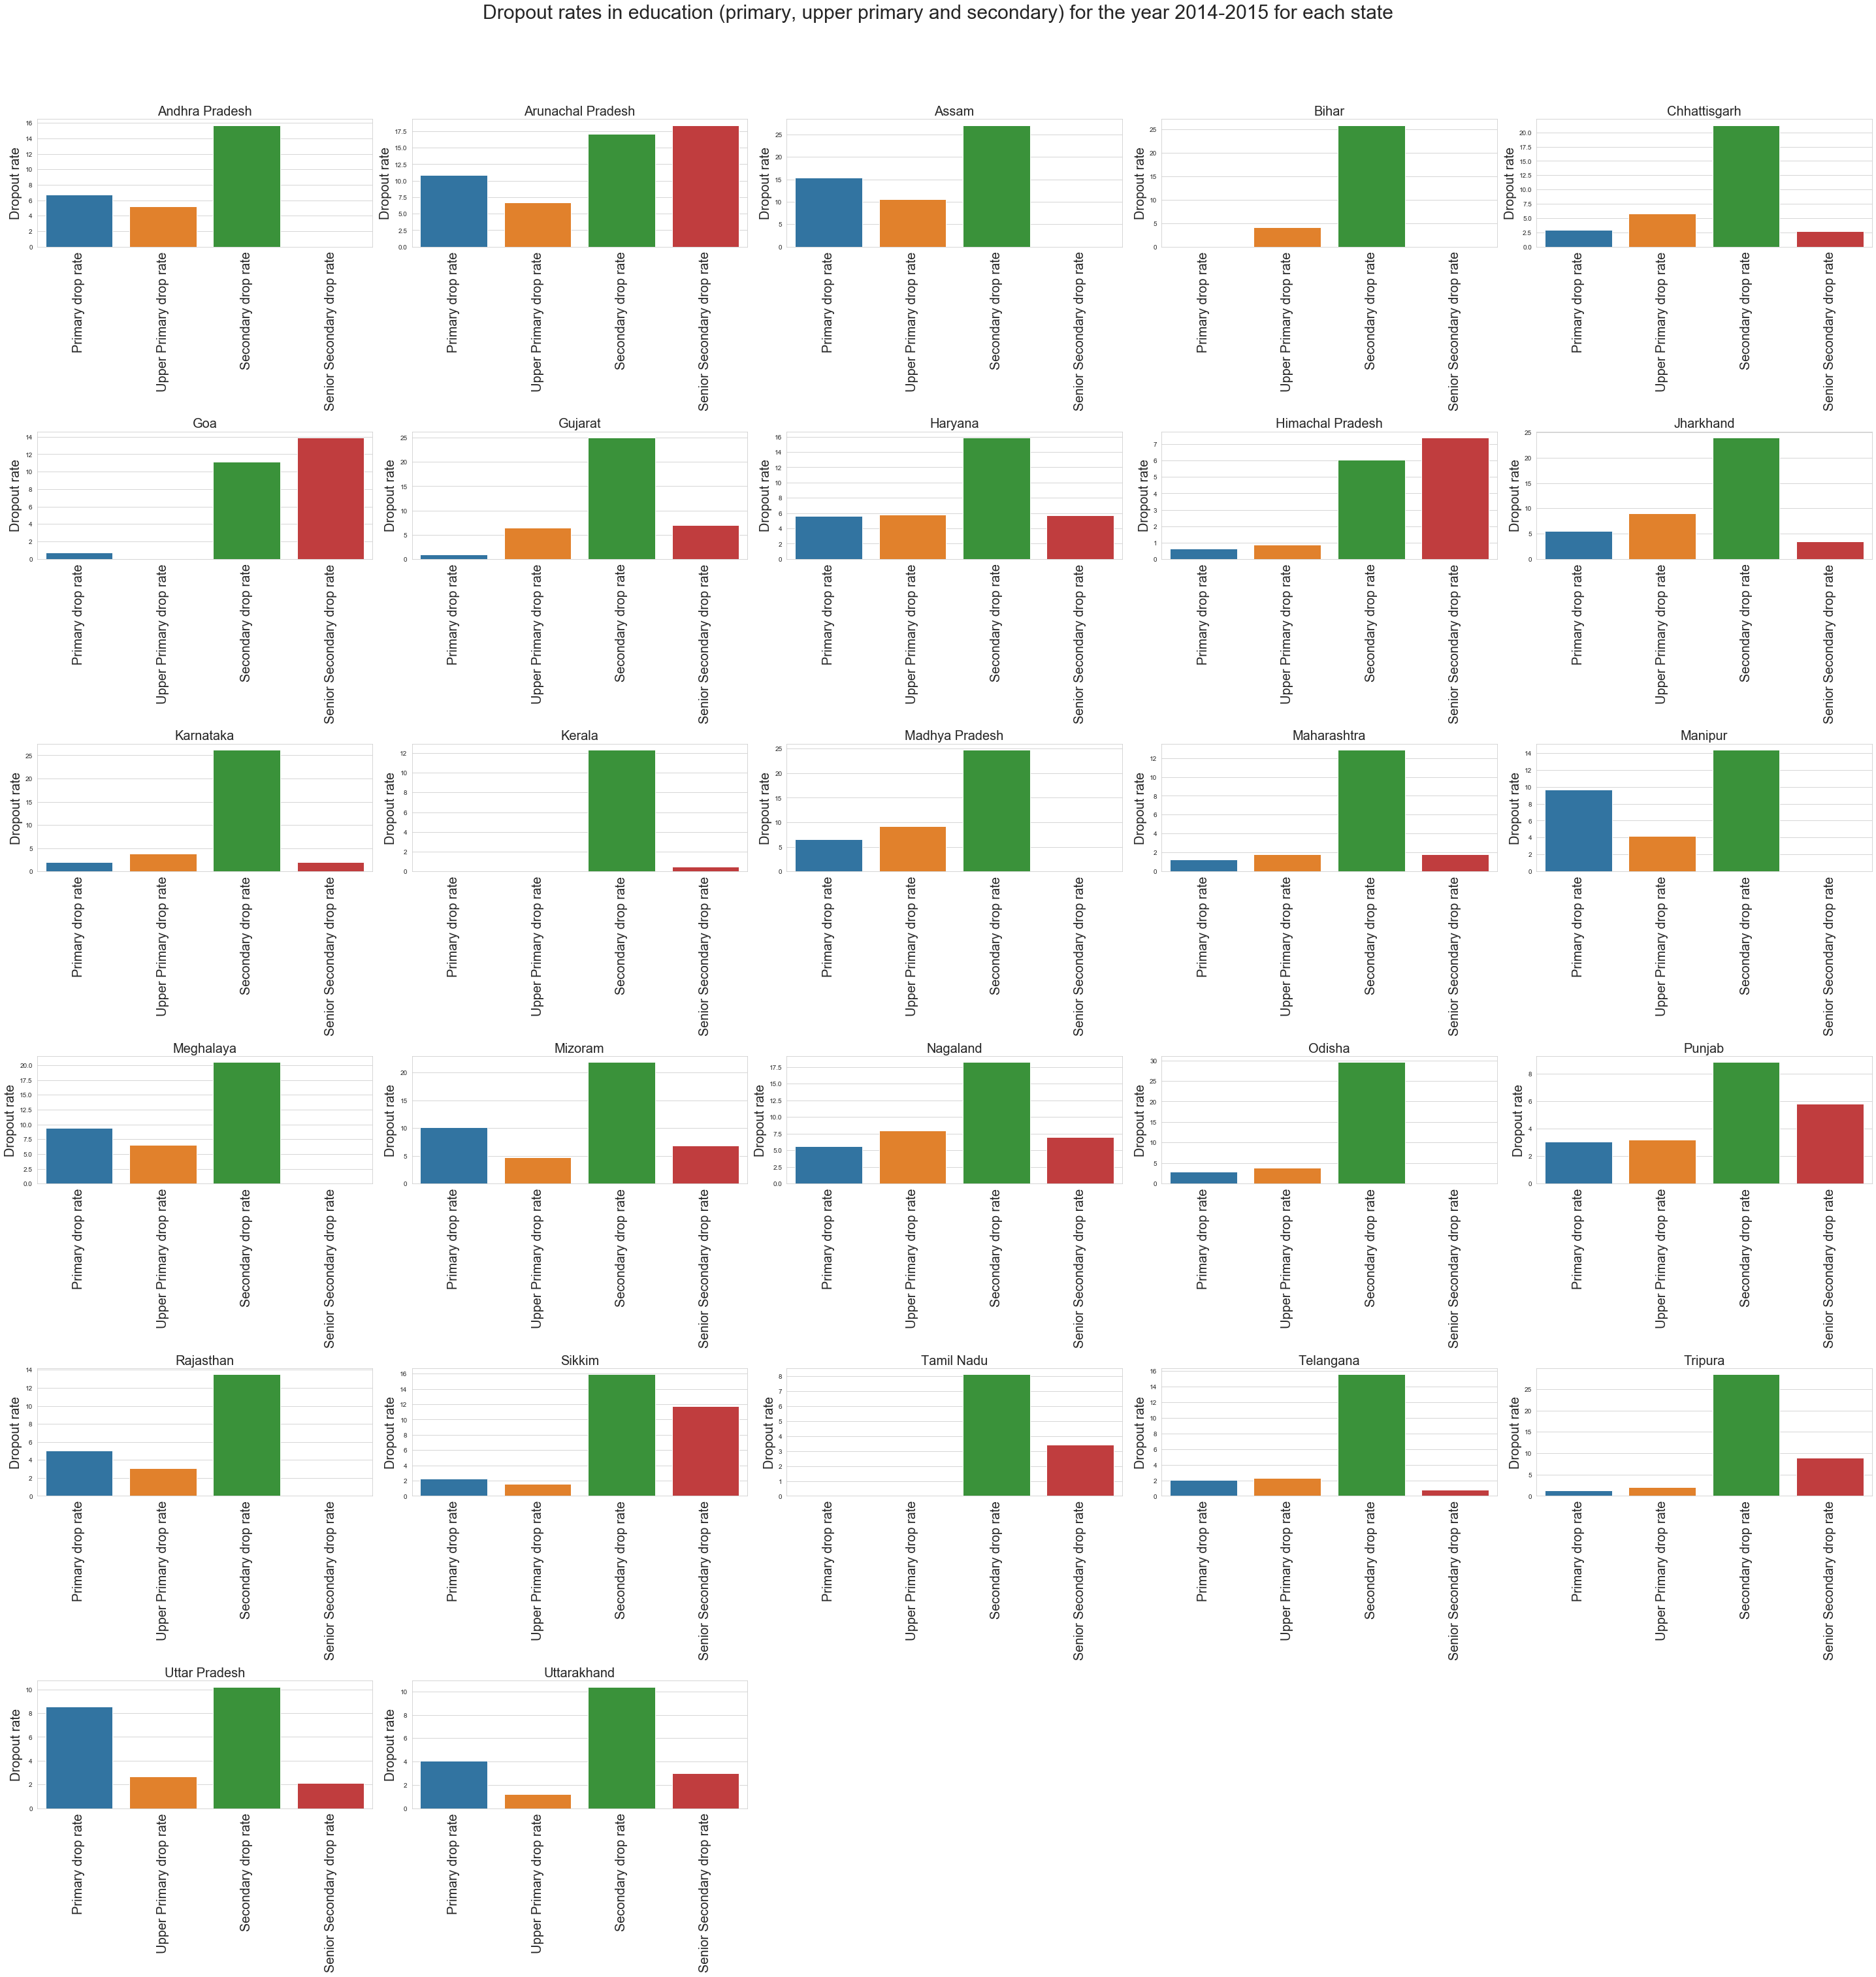

In [42]:
fig=plt.figure(figsize=(40,40))
fig.suptitle('Dropout rates in education (primary, upper primary and secondary) for the year 2014-2015 for each state',x=0.5, y=1.05,fontsize=30)
n=1
for i in States:
    plt.subplot(6,5,n)
    bp_dropout=sns.barplot(data=dropout[dropout['State']==i][['Primary drop rate', 'Upper Primary drop rate', 'Secondary drop rate', 'Senior Secondary drop rate']],estimator=np.sum)
    plt.xticks(rotation=90,fontsize=20)
    plt.ylabel('Dropout rate',fontsize=20)
    plt.title(i,fontsize=20)
    n=n+1
plt.tight_layout()
plt.show()

#### Correlation between Dropout rate and % Contribution of each sector (Primary, Secondary and Tertiary) to the total GDP

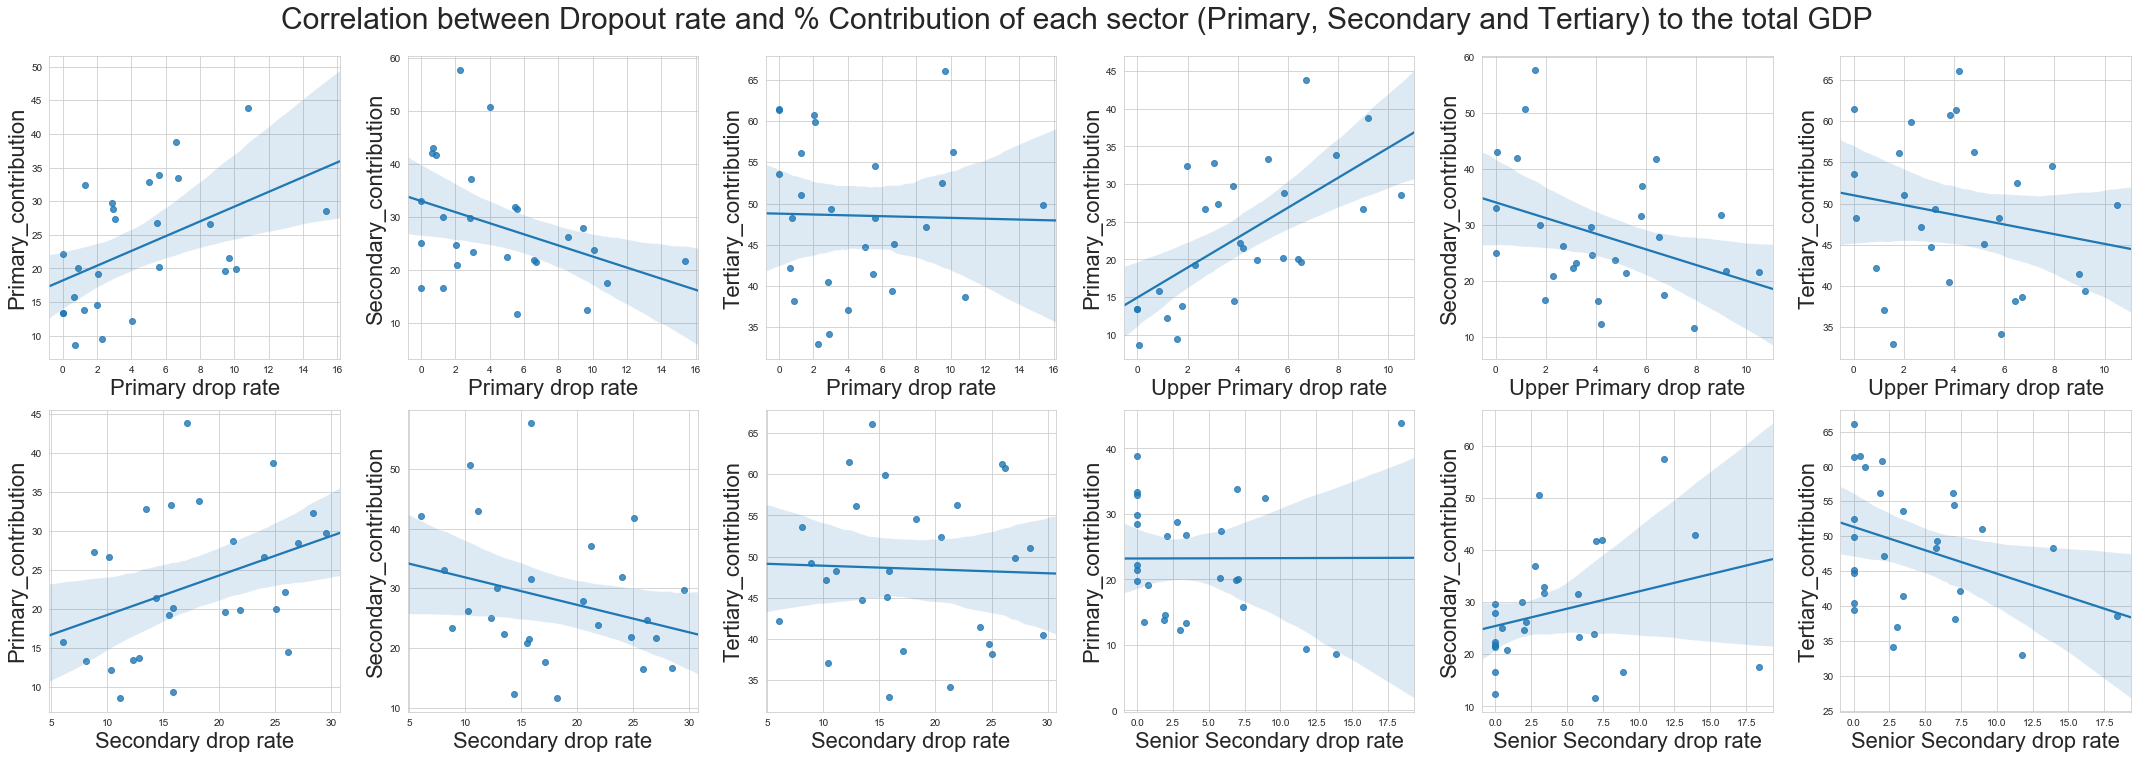

In [43]:
drop=['Primary drop rate', 'Upper Primary drop rate', 'Secondary drop rate', 'Senior Secondary drop rate']
sector=['Primary_contribution','Secondary_contribution','Tertiary_contribution']
z=1
fig=plt.figure(figsize=(30,10))
fig.suptitle('Correlation between Dropout rate and % Contribution of each sector (Primary, Secondary and Tertiary) to the total GDP',x=0.5, y=1.05,fontsize=30)
for i in drop:
    for j in sector:
        plt.subplot(2,6,z)
        sns.regplot(dropout[i],dropout[j],marker='o')
        plt.xlabel(i,fontsize=22)
        plt.ylabel(j,fontsize=22)
        z=z+1
plt.tight_layout()
plt.show()

#### Correlation between Dropout rates and Population

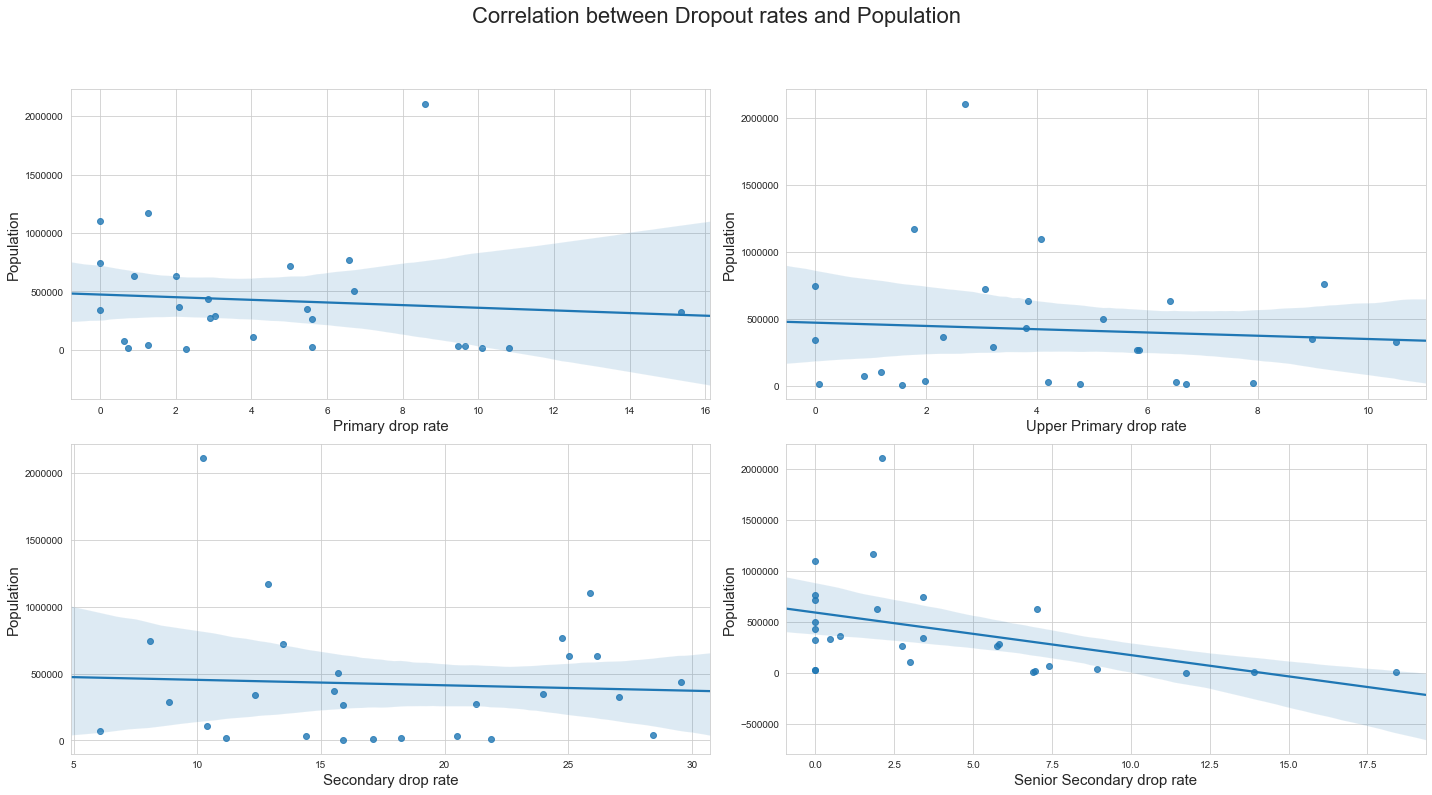

In [44]:
z=1
fig=plt.figure(figsize=(20,10))
fig.suptitle('Correlation between Dropout rates and Population',x=0.5, y=1.1,fontsize=22)
for i in drop:
    plt.subplot(2,2,z)
    sns.regplot(dropout[i],dropout['Population'],marker='o')
    plt.xlabel(i,fontsize=15)
    plt.ylabel("Population",fontsize=15)
    z=z+1
plt.tight_layout()
plt.show()

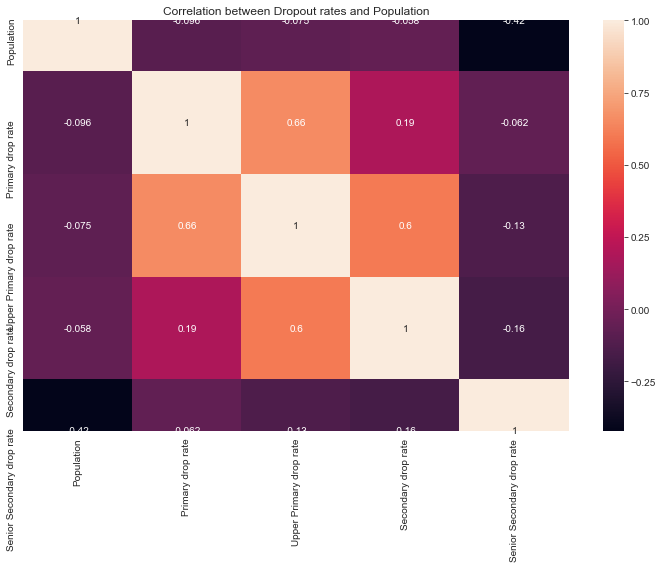

In [45]:
plt.figure(figsize=(10,8))
sns.heatmap(dropout[['Population','Primary drop rate', 'Upper Primary drop rate', 'Secondary drop rate', 'Senior Secondary drop rate']].corr(method="pearson"),annot=True)
plt.title('Correlation between Dropout rates and Population')
plt.tight_layout()
plt.show()

<p style="font-family: Arial; font-size:1.0em;color:blue;">Insight 1:<br>
There is a correlation between the dropout rates of Upper Primary and Primary Drop rate as well as Upper primary and Secondary drop rate. This might be becaus of the educational standards provided by the organizations or the lack of idea about the uimportance of education among the poor families.<br>
Several meetings and surveys should be conducted in rural areas to highlight the importance of education & must encourage the poor people to join the government schools. The standards of the teaching should also be improved in the government schools which will grab the attention of the parents  to  send their children to Schools.</p>

<p style="font-family: Arial; font-size:1.0em;color:blue;">
    Insight 2:<br>The GDP per capita is negatively correlated with Primary, Upper Primary and secondary drop rates with the correlation coefficient values -0.47, -0.56 and -0.47 respectively.
It means that if the if the drop out rate is high in the primary or upper primary or secondary sectors, the GDP per capita will be diminished. 
That means, education plays a important role in increasing the GDP per capita of the country.<p>

<p style="font-family: Arial; font-size:1.0em;color:blue;">
    Insight 3:<br>For the states where the primary contribution and secondary contribution is less, the primary dropout is very less.
Families in those states are more inclined towards education and are supporting the children in that field.
</p>